# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [267]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter
import plotly.offline as offline
import chart_studio.plotly as py
import plotly.graph_objs as go
# import plotly.offline as offline

offline.init_notebook_mode()
# suppress warnings
warnings.filterwarnings("ignore")

## 1.1 Reading Data

In [269]:
res_base_path = '../resources/'

project_data = pd.read_csv( res_base_path + 'train_data.csv',nrows=50000)
resource_data = pd.read_csv(res_base_path + 'resources.csv')
project_data.head(3)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      160221  p253737  c90749f5d961ff158d4b4d1e7dc665fc           Mrs.   
1      140945  p258326  897464ce9ddc600bced1151f324dd63a            Mr.   
2       21895  p182444  3465aaf82da834c0582ebd0ef8040ca0            Ms.   

  school_state project_submitted_datetime project_grade_category  \
0           IN        2016-12-05 13:43:57          Grades PreK-2   
1           FL        2016-10-25 09:22:10             Grades 6-8   
2           AZ        2016-08-31 12:03:56             Grades 6-8   

          project_subject_categories     project_subject_subcategories  \
0                Literacy & Language                     ESL, Literacy   
1  History & Civics, Health & Sports  Civics & Government, Team Sports   
2                    Health & Sports    Health & Wellness, Team Sports   

                                       project_title  \
0   Educational Support for English Learners at Home   
1              Wanted: Projector for Hungry Learners   
2  Soccer Equipment for AWESOME Middle School Stu...   

                                     project_essay_1  \
0  My students are English learners that are work...   
1  Our students arrive to our school eager to lea...   
2  \r\n\"True champions aren't always the ones th...   

                                     project_essay_2 project_essay_3  \
0  \"The limits of your language are the limits o...             NaN   
1  The projector we need for our school is very c...             NaN   
2  The students on the campus come to school know...             NaN   

  project_essay_4                           project_resource_summary  \
0             NaN  My students need opportunities to practice beg...   
1             NaN  My students need a projector to help with view...   
2             NaN  My students need shine guards, athletic socks,...   

   teacher_number_of_previously_posted_projects  project_is_approved  
0                                             0                    0  
1                                             7                    1  
2                                             1                    0

In [270]:
print("Number of data points in project data frame", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in project data frame (50000, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [271]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]

#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)

# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]

In [272]:
print("Number of data points in our resource data frame", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in our resource data frame (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [273]:
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

In [274]:
# join two dataframes in python: 
project_data = pd.merge(project_data, price_data, on='id', how='left')
project_data.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   
2      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491           Mrs.   
3       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc            Ms.   
4       57854  p099430  4000cfe0c8b2df75a218347c1765e283            Ms.   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades PreK-2   
1           WA 2016-04-27 01:05:25             Grades 3-5   
2           CA 2016-04-27 01:10:09             Grades 3-5   
3           CA 2016-04-27 02:04:15          Grades PreK-2   
4           IL 2016-04-27 07:19:44          Grades PreK-2   

         project_subject_categories project_subject_subcategories  \
0                  Applied Learning             Early Development   
1               Literacy & Language                      Literacy   
2  Math & Science, History & Civics  Mathematics, Social Sciences   
3               Literacy & Language                 ESL, Literacy   
4               Literacy & Language                      Literacy   

                              project_title  \
0    Flexible Seating for Flexible Learning   
1    Going Deep: The Art of Inner Thinking!   
2        Breakout Box to Ignite Engagement!   
3                         iPad for Learners   
4  A flexible classroom for flexible minds!   

                                     project_essay_1  \
0  I recently read an article about giving studen...   
1  My students crave challenge, they eat obstacle...   
2  It's the end of the school year. Routines have...   
3  Never has society so rapidly changed. Technolo...   
4  My students yearn for a classroom environment ...   

                                     project_essay_2  \
0  I teach at a low-income (Title 1) school. Ever...   
1  We are an urban, public k-5 elementary school....   
2  My students desire challenges, movement, and c...   
3  Our Language Arts and Social Justice Magnet Sc...   
4  I have the privilege of teaching an incredible...   

                                     project_essay_3  \
0  We need a classroom rug that we can use as a c...   
1  With the new common core standards that have b...   
2  I will design different clues using specific c...   
3  \"Is it my turn, Ms. K? When am I going to be ...   
4  Ideally, I would love to delve right into \"fl...   

                                     project_essay_4  \
0  Benjamin Franklin once said, \"Tell me and I f...   
1  These remarkable gifts will provide students w...   
2  Donations to this project will immediately imp...   
3  By donating to this project, you will give my ...   
4  This project will be so beneficial for my stud...   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   
2  My students need items from a \"Breakout Box\"...   
3                      My students need 1 ipad mini.   
4  My students need 5 Hokki Stools and an easel o...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                             2                    1   17.74   
2                                             6                    1  102.50   
3                                           127                    1  299.99   
4                                             1                    1  393.83   

   quantity  
0         9  
1        14  
2        11  
3         1  
4         9

In [275]:
print("Number of data points in project data after merging price and quantity", project_data.shape)
print(project_data.columns.values)

Number of data points in project data after merging price and quantity (50000, 19)
['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state' 'Date'
 'project_grade_category' 'project_subject_categories'
 'project_subject_subcategories' 'project_title' 'project_essay_1'
 'project_essay_2' 'project_essay_3' 'project_essay_4'
 'project_resource_summary' 'teacher_number_of_previously_posted_projects'
 'project_is_approved' 'price' 'quantity']


In [276]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 19 columns):
Unnamed: 0                                      50000 non-null int64
id                                              50000 non-null object
teacher_id                                      50000 non-null object
teacher_prefix                                  49998 non-null object
school_state                                    50000 non-null object
Date                                            50000 non-null datetime64[ns]
project_grade_category                          50000 non-null object
project_subject_categories                      50000 non-null object
project_subject_subcategories                   50000 non-null object
project_title                                   50000 non-null object
project_essay_1                                 50000 non-null object
project_essay_2                                 50000 non-null object
project_essay_3                             

## 1.2 Handling Null Values

In [277]:
# from above matric I know that teacher_prefix has 3 null values we need to handle that
# also most of values of project_essay_3 and project_essay_4 are null

project_data["teacher_prefix"].fillna( value = 'Mrs.', inplace = True) 

In [278]:
## 1.5 Combining 4 essay columns to get a single Essay column

project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

project_data.drop(['project_essay_1','project_essay_2','project_essay_3','project_essay_4'], axis=1, inplace=True)
# project_data['essay'].head()

In [279]:
# it can be clearly seen that we have handled all null values in our data frame.
project_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 16 columns):
Unnamed: 0                                      50000 non-null int64
id                                              50000 non-null object
teacher_id                                      50000 non-null object
teacher_prefix                                  50000 non-null object
school_state                                    50000 non-null object
Date                                            50000 non-null datetime64[ns]
project_grade_category                          50000 non-null object
project_subject_categories                      50000 non-null object
project_subject_subcategories                   50000 non-null object
project_title                                   50000 non-null object
project_resource_summary                        50000 non-null object
teacher_number_of_previously_posted_projects    50000 non-null int64
project_is_approved                          

In [280]:
# df_approved = project_data[project_data.project_is_approved==1].tail(500)
# df_rejected = project_data[project_data.project_is_approved==0].tail(500)

# final_df = pd.concat([df_approved, df_rejected])
# print(final_df.shape)

final_df = project_data

## 1.3 preprocessing of `project_subject_categories`

In [281]:
def preprocess_text(column_name):
    catogories = list(final_df[column_name].values)
    # remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039
    # https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
    # https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
    # https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
    cat_list = []
    for i in catogories:
        temp = ""
        # consider we have text like this "Math & Science, Warmth, Care & Hunger"
        for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
            if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
                j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
            j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
            temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
            temp = temp.replace('&','_') # we are replacing the & value into 
        cat_list.append(temp.strip())
    return cat_list    
        

In [282]:
# preprocessing of `project_subject_categories`
final_df['clean_categories'] = preprocess_text('project_subject_categories')
final_df.drop(['project_subject_categories'], axis=1, inplace=True)

## 1.4 preprocessing of `project_subject_subcategories`

In [283]:
# preprocessing of `project_subject_subcategories`
final_df['clean_subcategories'] = preprocess_text('project_subject_subcategories')
final_df.drop(['project_subject_subcategories'], axis=1, inplace=True)

## 1.5 Adding New Feature  `No. of words in project_title`

In [284]:
final_df['title_word_count'] = final_df['project_title'].apply(lambda x: len(x.split()))

In [285]:
final_df.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3           Mrs.   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5           Mrs.   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades PreK-2   
1           WA 2016-04-27 01:05:25             Grades 3-5   

                            project_title  \
0  Flexible Seating for Flexible Learning   
1  Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                             2                    1   17.74   

   quantity                                              essay  \
0         9  I recently read an article about giving studen...   
1        14  My students crave challenge, they eat obstacle...   

    clean_categories clean_subcategories  title_word_count  
0    AppliedLearning    EarlyDevelopment                 5  
1  Literacy_Language            Literacy                 7

## 1.6 Preprocessing project grade category

In [286]:
# replacing space with _.
final_df['project_grade_category'] = final_df['project_grade_category'].apply(lambda x: x.replace(' ', '_').replace('-', '_'))
print('Post Preprocessing: ')
final_df['project_grade_category'].value_counts()

Post Preprocessing: 


Grades_PreK_2    20316
Grades_3_5       16968
Grades_6_8        7750
Grades_9_12       4966
Name: project_grade_category, dtype: int64

## 1.7 Preprocessing teacher_prefix

In [287]:
# replacing '.' with ''
final_df['teacher_prefix'] = final_df['teacher_prefix'].apply(lambda x: x.replace('.', ''))
print('Post Preprocessing: ')
final_df['teacher_prefix'].value_counts()

Post Preprocessing: 


Mrs        26142
Ms         17936
Mr          4859
Teacher     1061
Dr             2
Name: teacher_prefix, dtype: int64

## 1.8 Adding New Feature  `No. of words in Essay`

In [288]:
final_df['essay_word_count'] = final_df['essay'].apply(lambda x: len(x.split()))

In [289]:
final_df.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades_PreK_2   
1           WA 2016-04-27 01:05:25             Grades_3_5   

                            project_title  \
0  Flexible Seating for Flexible Learning   
1  Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                             2                    1   17.74   

   quantity                                              essay  \
0         9  I recently read an article about giving studen...   
1        14  My students crave challenge, they eat obstacle...   

    clean_categories clean_subcategories  title_word_count  essay_word_count  
0    AppliedLearning    EarlyDevelopment                 5               225  
1  Literacy_Language            Literacy                 7               184

## 1.9 Preprocessing of `essay`

In [290]:
# https://stackoverflow.com/a/47091490/4084039
import re
from tqdm import tqdm

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase


# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


def preprocess_sentences(column_name):
    preprocessed = []
    # tqdm is for printing the status bar
    for sentance in tqdm(final_df[column_name].values):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\"', ' ')
        sent = sent.replace('\\n', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed.append(sent.lower().strip())
    return preprocessed  

In [291]:
final_df['clean_essay'] = preprocess_sentences('essay')
final_df.drop(['essay'], axis=1, inplace=True)
final_df.head(2)

100%|██████████| 50000/50000 [00:30<00:00, 1655.89it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades_PreK_2   
1           WA 2016-04-27 01:05:25             Grades_3_5   

                            project_title  \
0  Flexible Seating for Flexible Learning   
1  Going Deep: The Art of Inner Thinking!   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                             2                    1   17.74   

   quantity   clean_categories clean_subcategories  title_word_count  \
0         9    AppliedLearning    EarlyDevelopment                 5   
1        14  Literacy_Language            Literacy                 7   

   essay_word_count                                        clean_essay  
0               225  recently read article giving students choice l...  
1               184  students crave challenge eat obstacles breakfa...

## 1.10 Preprocessing of `project_title`

In [292]:
# preprocessing of `project_title`
final_df['clean_title'] = preprocess_sentences('project_title')
final_df.drop(['project_title'], axis=1, inplace=True)
final_df.head(2)

100%|██████████| 50000/50000 [00:01<00:00, 37061.12it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades_PreK_2   
1           WA 2016-04-27 01:05:25             Grades_3_5   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                             2                    1  481.04   
1                                             2                    1   17.74   

   quantity   clean_categories clean_subcategories  title_word_count  \
0         9    AppliedLearning    EarlyDevelopment                 5   
1        14  Literacy_Language            Literacy                 7   

   essay_word_count                                        clean_essay  \
0               225  recently read article giving students choice l...   
1               184  students crave challenge eat obstacles breakfa...   

                          clean_title  
0  flexible seating flexible learning  
1       going deep art inner thinking

## 1.11 Calculate `Sentiment Scores` for the `essays`

In [293]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = analyzer.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')


neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rohitsingh/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [295]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer 


neg=[]
pos=[]
neu=[]
compound = []

for i in tqdm(range(len(final_df['clean_essay']))):
    sentiment_scores = analyzer.polarity_scores(final_df['clean_essay'][i])
    neg.append(sentiment_scores['neg'])
    pos.append(sentiment_scores['pos'])
    neu.append(sentiment_scores['neu'])
    compound.append(sentiment_scores['compound'])


final_df['essay_sent_pos'] = pos
final_df['essay_sent_neg'] = neg
final_df['essay_sent_neu'] = neu
final_df['essay_sent_compound'] = compound



# final_df['essay_sent_pos'] = final_df['clean_essay'].apply(lambda x: analyzer.polarity_scores(x)['pos'])
# final_df['essay_sent_neg'] = final_df['clean_essay'].apply(lambda x: analyzer.polarity_scores(x)['neg'])
# final_df['essay_sent_neu'] = final_df['clean_essay'].apply(lambda x: analyzer.polarity_scores(x)['neu'])
# final_df['essay_sent_compound'] = final_df['clean_essay'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

final_df.head()

100%|██████████| 50000/50000 [01:18<00:00, 638.58it/s]


Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   
2      146723  p099708  c0a28c79fe8ad5810da49de47b3fb491            Mrs   
3       72317  p087808  598621c141cda5fb184ee7e8ccdd3fcc             Ms   
4       57854  p099430  4000cfe0c8b2df75a218347c1765e283             Ms   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades_PreK_2   
1           WA 2016-04-27 01:05:25             Grades_3_5   
2           CA 2016-04-27 01:10:09             Grades_3_5   
3           CA 2016-04-27 02:04:15          Grades_PreK_2   
4           IL 2016-04-27 07:19:44          Grades_PreK_2   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   
2  My students need items from a \"Breakout Box\"...   
3                      My students need 1 ipad mini.   
4  My students need 5 Hokki Stools and an easel o...   

   teacher_number_of_previously_posted_projects  project_is_approved  ...  \
0                                             2                    1  ...   
1                                             2                    1  ...   
2                                             6                    1  ...   
3                                           127                    1  ...   
4                                             1                    1  ...   

              clean_categories         clean_subcategories title_word_count  \
0              AppliedLearning            EarlyDevelopment                5   
1            Literacy_Language                    Literacy                7   
2  Math_Science History_Civics  Mathematics SocialSciences                5   
3            Literacy_Language                ESL Literacy                3   
4            Literacy_Language                    Literacy                6   

  essay_word_count                                        clean_essay  \
0              225  recently read article giving students choice l...   
1              184  students crave challenge eat obstacles breakfa...   
2              285  end school year routines run course students n...   
3              317  never society rapidly changed technology invad...   
4              275  students yearn classroom environment matches d...   

                          clean_title essay_sent_pos essay_sent_neg  \
0  flexible seating flexible learning          0.194          0.031   
1       going deep art inner thinking          0.315          0.031   
2      breakout box ignite engagement          0.295          0.014   
3                       ipad learners          0.164          0.068   
4   flexible classroom flexible minds          0.424          0.012   

   essay_sent_neu  essay_sent_compound  
0           0.775               0.9524  
1           0.653               0.9873  
2           0.691               0.9935  
3           0.768               0.9484  
4           0.564               0.9976  

[5 rows x 22 columns]

<h2>2.1 Splitting data into Train, Cross validation and Test: Stratified Sampling</h2>

In [297]:
# I have divided the data into train, cv and test set with ratio 60:20:20 .

y_true = final_df['project_is_approved']

# X_1, X_test, y_1, y_test = train_test_split(final_df, y_true, test_size=0.2, random_state=0)
# X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.2,random_state=0)

X_1, X_test, y_1, y_test = train_test_split(final_df, y_true, stratify=y_true, test_size=0.2, random_state=0)
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, test_size=0.2, stratify=y_1,  random_state=0)


In [298]:
# X_train.drop(['project_is_approved'], axis=1, inplace=True)
# X_cv.drop(['project_is_approved'], axis=1, inplace=True)
# X_test.drop(['project_is_approved'], axis=1, inplace=True)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [299]:
X_train.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'title_word_count', 'essay_word_count', 'clean_essay', 'clean_title',
       'essay_sent_pos', 'essay_sent_neg', 'essay_sent_neu',
       'essay_sent_compound'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - title_word_count: No. of words in project_title
       _ essay_word_count: No. of words in essay.
       
       
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - clean_title : text data
       - clean_essay : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

<h2>2.2.1 Vectorizing numerical features</h2>

* I am using one hot encoding technique to encode our categorical features.


<h2> A) Price</h2>

In [300]:
# encoding price
from sklearn.preprocessing import StandardScaler

# standardizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: # array=[105.22 215.96 96.01 ... 368.98 80.53 709.67].
# Reshape your data either using
# array.reshape(-1, 1) if your data has a single feature
# array.reshape(1, -1) if it contains a single sample.


standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['price'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

price_train = standardizer.transform(X_train['price'].values.reshape(-1, 1))
price_cv = standardizer.transform(X_cv['price'].values.reshape(-1, 1))
price_test = standardizer.transform(X_test['price'].values.reshape(-1, 1))


print('Post Standardization')
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)
print('*'*100)

Mean : 300.18863124999996, Standard deviation : 379.86522901654905

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> B) Quantity</h2>

In [301]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['quantity'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

quantity_train = standardizer.transform(X_train['quantity'].values.reshape(-1, 1))
quantity_cv = standardizer.transform(X_cv['quantity'].values.reshape(-1, 1))
quantity_test = standardizer.transform(X_test['quantity'].values.reshape(-1, 1))


print('Post Standardization')
print(quantity_train.shape, y_train.shape)
print(quantity_cv.shape, y_cv.shape)
print(quantity_test.shape, y_test.shape)
print('*'*100)

Mean : 17.15259375, Standard deviation : 26.355897042169918

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> C) Number of projects previously posted by Teacher</h2>

In [302]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

prev_teacher_proj_train = standardizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_teacher_proj_cv = standardizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))
prev_teacher_proj_test = standardizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))


print('Post Standardization')
print(prev_teacher_proj_train.shape, y_train.shape)
print(prev_teacher_proj_cv.shape, y_cv.shape)
print(prev_teacher_proj_test.shape, y_test.shape)
print('*'*100)

Mean : 11.27425, Standard deviation : 28.24448573505101

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> D) Title word Count</h2>

In [303]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['title_word_count'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

title_word_count_train = standardizer.transform(X_train['title_word_count'].values.reshape(-1, 1))
title_word_count_cv = standardizer.transform(X_cv['title_word_count'].values.reshape(-1, 1))
title_word_count_test = standardizer.transform(X_test['title_word_count'].values.reshape(-1, 1))


print('Post Standardization')
print(title_word_count_train.shape, y_train.shape)
print(title_word_count_cv.shape, y_cv.shape)
print(title_word_count_test.shape, y_test.shape)
print('*'*100)

Mean : 5.1594375, Standard deviation : 2.1039141340828884

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> E) Essay word Count</h2>

In [304]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_word_count'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_word_count_train = standardizer.transform(X_train['essay_word_count'].values.reshape(-1, 1))
essay_word_count_cv = standardizer.transform(X_cv['essay_word_count'].values.reshape(-1, 1))
essay_word_count_test = standardizer.transform(X_test['essay_word_count'].values.reshape(-1, 1))


print('Post Standardization')
print(essay_word_count_train.shape, y_train.shape)
print(essay_word_count_cv.shape, y_cv.shape)
print(essay_word_count_test.shape, y_test.shape)
print('*'*100)

Mean : 255.203, Standard deviation : 65.4401237086239

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> F) Essay Sentiment Pos</h2>

In [305]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_sent_pos'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_sent_pos_train = standardizer.transform(X_train['essay_sent_pos'].values.reshape(-1, 1))
essay_sent_pos_cv = standardizer.transform(X_cv['essay_sent_pos'].values.reshape(-1, 1))
essay_sent_pos_test = standardizer.transform(X_test['essay_sent_pos'].values.reshape(-1, 1))


print('Post Standardization')
print(essay_sent_pos_train.shape, y_train.shape)
print(essay_sent_pos_cv.shape, y_cv.shape)
print(essay_sent_pos_test.shape, y_test.shape)
print('*'*100)


Mean : 0.28189700000000006, Standard deviation : 0.07763431476157949

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> G) Essay Sentiment Neg</h2>

In [306]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_sent_neg'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_sent_neg_train = standardizer.transform(X_train['essay_sent_neg'].values.reshape(-1, 1))
essay_sent_neg_cv = standardizer.transform(X_cv['essay_sent_neg'].values.reshape(-1, 1))
essay_sent_neg_test = standardizer.transform(X_test['essay_sent_neg'].values.reshape(-1, 1))

print('Post Standardization')
print(essay_sent_neg_train.shape, y_train.shape)
print(essay_sent_neg_cv.shape, y_cv.shape)
print(essay_sent_neg_test.shape, y_test.shape)
print('*'*100)

Mean : 0.047956874999999996, Standard deviation : 0.03577885744730224

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> H) Essay Sentiment Neu</h2>

In [307]:
# final_df['essay_sent_neu'] = final_df['clean_essay'].apply(lambda x: analyzer.polarity_scores(x)['neu'])

standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_sent_neu'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_sent_neu_train = standardizer.transform(X_train['essay_sent_neu'].values.reshape(-1, 1))
essay_sent_neu_cv = standardizer.transform(X_cv['essay_sent_neu'].values.reshape(-1, 1))
essay_sent_neu_test = standardizer.transform(X_test['essay_sent_neu'].values.reshape(-1, 1))

print('Post Standardization')
print(essay_sent_neu_train.shape, y_train.shape)
print(essay_sent_neu_cv.shape, y_cv.shape)
print(essay_sent_neu_test.shape, y_test.shape)
print('*'*100)

Mean : 0.67014475, Standard deviation : 0.07556945843022497

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> I) Essay Sentiment Compound</h2>

In [308]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['essay_sent_compound'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

essay_sent_compound_train = standardizer.transform(X_train['essay_sent_compound'].values.reshape(-1, 1))
essay_sent_compound_cv = standardizer.transform(X_cv['essay_sent_compound'].values.reshape(-1, 1))
essay_sent_compound_test = standardizer.transform(X_test['essay_sent_compound'].values.reshape(-1, 1))


print('Post Standardization')
print(essay_sent_compound_train.shape, y_train.shape)
print(essay_sent_compound_cv.shape, y_cv.shape)
print(essay_sent_compound_test.shape, y_test.shape)
print('*'*100)

Mean : 0.9588204906250001, Standard deviation : 0.1525656035626864

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


## 2.2.2 Encoding categorical features `(Response Coding)`


In [309]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

In [310]:
proj_approved = X_train[project_data.project_is_approved==1]
proj_rejected = X_train[project_data.project_is_approved==0]


X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)


print(proj_approved.shape)
print(proj_rejected.shape)

(27063, 22)
(4937, 22)


<h2> A) Encoding clean_categories</h2>

In [311]:
all_proj_categories = X_train['clean_categories'].value_counts()
approved_proj_categories = proj_approved['clean_categories'].value_counts()
rejected_proj_categories = proj_rejected['clean_categories'].value_counts()

approved_cat = {}
rejected_cat = {}

for key, val in approved_proj_categories.iteritems():
    approved_cat[key] = val / all_proj_categories[key]
    
for key, val in rejected_proj_categories.iteritems():
    rejected_cat[key] = val / all_proj_categories[key]

    
print('Approved Project Categories: ')
print(approved_cat)
print('*'*100)

print('Rejected Project Categories: ')
print(rejected_cat)
print('*'*100)


X_train['categories_approved'] = X_train['clean_categories'].apply(lambda x: approved_cat[x] if x in approved_cat.keys() else 1)
X_train['categories_rejected'] = X_train['clean_categories'].apply(lambda x: rejected_cat[x] if x in rejected_cat.keys() else 1)

X_cv['categories_approved'] = X_cv['clean_categories'].apply(lambda x: approved_cat[x] if x in approved_cat.keys() else 1)
X_cv['categories_rejected'] = X_cv['clean_categories'].apply(lambda x: rejected_cat[x] if x in rejected_cat.keys() else 1)

X_test['categories_approved'] = X_test['clean_categories'].apply(lambda x: approved_cat[x] if x in approved_cat.keys() else 1)
X_test['categories_rejected'] = X_test['clean_categories'].apply(lambda x: rejected_cat[x] if x in rejected_cat.keys() else 1)


X_test.head(2)

Approved Project Categories: 
{'Literacy_Language': 0.8676092544987146, 'Math_Science': 0.8144622240226859, 'Literacy_Language Math_Science': 0.8632682229633158, 'Health_Sports': 0.8525239194985154, 'Music_Arts': 0.8736083824492469, 'Literacy_Language SpecialNeeds': 0.8593091828138163, 'SpecialNeeds': 0.8061309030654515, 'AppliedLearning': 0.8089579524680073, 'Math_Science Literacy_Language': 0.8629283489096573, 'AppliedLearning Literacy_Language': 0.8394863563402889, 'Math_Science SpecialNeeds': 0.8044217687074829, 'History_Civics': 0.8213627992633518, 'Literacy_Language Music_Arts': 0.8297872340425532, 'Math_Science Music_Arts': 0.8272357723577236, 'History_Civics Literacy_Language': 0.9241706161137441, 'Warmth Care_Hunger': 0.9219143576826196, 'Health_Sports SpecialNeeds': 0.8808933002481389, 'AppliedLearning SpecialNeeds': 0.80622009569378, 'Math_Science AppliedLearning': 0.835195530726257, 'AppliedLearning Math_Science': 0.7922077922077922, 'Literacy_Language History_Civics': 0.89

Unnamed: 0       id                        teacher_id teacher_prefix  \
39510       97629  p030866  51e1ea41970d4da12b26c8a9517198a0            Mrs   
37058      110225  p029816  78563a0f693b77d5cad7216898d5b695             Ms   

      school_state                Date project_grade_category  \
39510           AL 2017-01-26 11:31:02             Grades_3_5   
37058           GA 2017-01-08 21:04:31          Grades_PreK_2   

                                project_resource_summary  \
39510  My students need one special needs swing to en...   
37058  My students need Chromebooks in our classroom ...   

       teacher_number_of_previously_posted_projects   price  ...  \
39510                                            12  447.29  ...   
37058                                             5  242.29  ...   

       title_word_count essay_word_count  \
39510                 3              208   
37058                 2              235   

                                             clean_essay          clean_title  \
39510  pe teacher elementary school poverty level stu...  special needs swing   
37058  every day adventure every day great day classr...     chromebook craze   

       essay_sent_pos essay_sent_neg essay_sent_neu  essay_sent_compound  \
39510           0.335          0.063          0.601               0.9847   
37058           0.281          0.012          0.707               0.9921   

       categories_approved  categories_rejected  
39510             0.806131             0.193869  
37058             0.863268             0.136732  

[2 rows x 23 columns]

In [312]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['categories_approved'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

categories_approved_train = standardizer.transform(X_train['categories_approved'].values.reshape(-1, 1))
categories_approved_cv = standardizer.transform(X_cv['categories_approved'].values.reshape(-1, 1))
categories_approved_test = standardizer.transform(X_test['categories_approved'].values.reshape(-1, 1))


print('Post Standardization')
print(categories_approved_train.shape, y_train.shape)
print(categories_approved_cv.shape, y_cv.shape)
print(categories_approved_test.shape, y_test.shape)
print('*'*100)


Mean : 0.84575, Standard deviation : 0.030535329539086557

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


In [313]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['categories_rejected'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

categories_rejected_train = standardizer.transform(X_train['categories_rejected'].values.reshape(-1, 1))
categories_rejected_cv = standardizer.transform(X_cv['categories_rejected'].values.reshape(-1, 1))
categories_rejected_test = standardizer.transform(X_test['categories_rejected'].values.reshape(-1, 1))


print('Post Standardization')
print(categories_rejected_train.shape, y_train.shape)
print(categories_rejected_cv.shape, y_cv.shape)
print(categories_rejected_test.shape, y_test.shape)
print('*'*100)

Mean : 0.154625, Standard deviation : 0.034519244271284576

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> B) Encoding clean_subcategories</h2>

In [314]:
all_proj_sub_categories = X_train['clean_subcategories'].value_counts()
approved_proj_sub_categories = proj_approved['clean_subcategories'].value_counts()
rejected_proj_sub_categories = proj_rejected['clean_subcategories'].value_counts()

approved_sub_cat = {}
rejected_sub_cat = {}

for key, val in approved_proj_sub_categories.iteritems():
    approved_sub_cat[key] = val / all_proj_sub_categories[key]
    
for key, val in rejected_proj_sub_categories.iteritems():
    rejected_sub_cat[key] = val / all_proj_sub_categories[key]

    
print('Approved Project Sub Categories: ')
print(approved_sub_cat)
print('*'*100)

print('Rejected Project Sub Categories: ')
print(rejected_sub_cat)
print('*'*100)

X_train['sub_categories_approved'] = X_train['clean_subcategories'].apply(lambda x: approved_sub_cat[x] if x in approved_sub_cat.keys() else 1)
X_train['sub_categories_rejected'] = X_train['clean_subcategories'].apply(lambda x: rejected_sub_cat[x] if x in rejected_sub_cat.keys() else 1)

X_cv['sub_categories_approved'] = X_cv['clean_subcategories'].apply(lambda x: approved_sub_cat[x] if x in approved_sub_cat.keys() else 1)
X_cv['sub_categories_rejected'] = X_cv['clean_subcategories'].apply(lambda x: rejected_sub_cat[x] if x in rejected_sub_cat.keys() else 1)

X_test['sub_categories_approved'] = X_test['clean_subcategories'].apply(lambda x: approved_sub_cat[x] if x in approved_sub_cat.keys() else 1)
X_test['sub_categories_rejected'] = X_test['clean_subcategories'].apply(lambda x: rejected_sub_cat[x] if x in rejected_sub_cat.keys() else 1)


X_test.head(2)

Approved Project Sub Categories: 
{'Literacy': 0.8907296439901304, 'Literacy Mathematics': 0.8674749163879598, 'Literature_Writing Mathematics': 0.8603286384976526, 'Literacy Literature_Writing': 0.8677784395473496, 'Mathematics': 0.8228829993535876, 'Literature_Writing': 0.8309968847352025, 'SpecialNeeds': 0.8061309030654515, 'Health_Wellness': 0.8768382352941176, 'AppliedSciences Mathematics': 0.817910447761194, 'Literacy SpecialNeeds': 0.8756684491978609, 'ESL Literacy': 0.8637724550898204, 'Gym_Fitness Health_Wellness': 0.8828125, 'VisualArts': 0.8484375, 'AppliedSciences': 0.792341678939617, 'Music': 0.9090909090909091, 'Warmth Care_Hunger': 0.9219143576826196, 'Literature_Writing SpecialNeeds': 0.8298429319371727, 'Health_Wellness SpecialNeeds': 0.8904494382022472, 'Gym_Fitness': 0.8073654390934845, 'Mathematics SpecialNeeds': 0.7888888888888889, 'EnvironmentalScience': 0.8288288288288288, 'TeamSports': 0.827922077922078, 'Music PerformingArts': 0.8992805755395683, 'Environmental

Unnamed: 0       id                        teacher_id teacher_prefix  \
39510       97629  p030866  51e1ea41970d4da12b26c8a9517198a0            Mrs   
37058      110225  p029816  78563a0f693b77d5cad7216898d5b695             Ms   

      school_state                Date project_grade_category  \
39510           AL 2017-01-26 11:31:02             Grades_3_5   
37058           GA 2017-01-08 21:04:31          Grades_PreK_2   

                                project_resource_summary  \
39510  My students need one special needs swing to en...   
37058  My students need Chromebooks in our classroom ...   

       teacher_number_of_previously_posted_projects   price  ...  \
39510                                            12  447.29  ...   
37058                                             5  242.29  ...   

                                             clean_essay          clean_title  \
39510  pe teacher elementary school poverty level stu...  special needs swing   
37058  every day adventure every day great day classr...     chromebook craze   

      essay_sent_pos  essay_sent_neg  essay_sent_neu essay_sent_compound  \
39510          0.335           0.063           0.601              0.9847   
37058          0.281           0.012           0.707              0.9921   

      categories_approved  categories_rejected  sub_categories_approved  \
39510            0.806131             0.193869                 0.806131   
37058            0.863268             0.136732                 0.860329   

       sub_categories_rejected  
39510                 0.193869  
37058                 0.139671  

[2 rows x 25 columns]

In [315]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['sub_categories_approved'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

sub_categories_approved_train = standardizer.transform(X_train['sub_categories_approved'].values.reshape(-1, 1))
sub_categories_approved_cv = standardizer.transform(X_cv['sub_categories_approved'].values.reshape(-1, 1))
sub_categories_approved_test = standardizer.transform(X_test['sub_categories_approved'].values.reshape(-1, 1))


print('Post Standardization')
print(sub_categories_approved_train.shape, y_train.shape)
print(sub_categories_approved_cv.shape, y_cv.shape)
print(sub_categories_approved_test.shape, y_test.shape)
print('*'*100)

Mean : 0.84621875, Standard deviation : 0.048390147935883934

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


In [316]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['sub_categories_rejected'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

sub_categories_rejected_train = standardizer.transform(X_train['sub_categories_rejected'].values.reshape(-1, 1))
sub_categories_rejected_cv = standardizer.transform(X_cv['sub_categories_rejected'].values.reshape(-1, 1))
sub_categories_rejected_test = standardizer.transform(X_test['sub_categories_rejected'].values.reshape(-1, 1))


print('Post Standardization')
print(sub_categories_rejected_train.shape, y_train.shape)
print(sub_categories_rejected_cv.shape, y_cv.shape)
print(sub_categories_rejected_test.shape, y_test.shape)
print('*'*100)

Mean : 0.16271875, Standard deviation : 0.0919259901619598

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> C) Encoding school_state</h2>

In [317]:
all_school_states = X_train['school_state'].value_counts()
approved_school_states = proj_approved['school_state'].value_counts()
rejected_school_states = proj_rejected['school_state'].value_counts()

approved_states = {}
rejected_states = {}

for key, val in approved_school_states.iteritems():
    approved_states[key] = val / all_school_states[key]
    
for key, val in rejected_school_states.iteritems():
    rejected_states[key] = val / all_school_states[key]

    
print('Approved School States:')
print(approved_states)
print('*'*100)

print('Rejected School States:')
print(rejected_states)
print('*'*100)

X_train['school_state_approved'] = X_train['school_state'].apply(lambda x: approved_states[x] if x in approved_states.keys() else 1)
X_train['school_state_rejected'] = X_train['school_state'].apply(lambda x: rejected_states[x] if x in rejected_states.keys() else 1)

X_cv['school_state_approved'] = X_cv['school_state'].apply(lambda x: approved_states[x] if x in approved_states.keys() else 1)
X_cv['school_state_rejected'] = X_cv['school_state'].apply(lambda x: rejected_states[x] if x in rejected_states.keys() else 1)

X_test['school_state_approved'] = X_test['school_state'].apply(lambda x: approved_states[x] if x in approved_states.keys() else 1)
X_test['school_state_rejected'] = X_test['school_state'].apply(lambda x: rejected_states[x] if x in rejected_states.keys() else 1)


X_test.head(2)

Approved School States:
{'CA': 0.8558981233243967, 'NY': 0.8603910868576625, 'TX': 0.8045540796963947, 'FL': 0.8166127292340885, 'NC': 0.8571428571428571, 'IL': 0.838223632038065, 'SC': 0.8596938775510204, 'GA': 0.8472573839662447, 'MI': 0.8368421052631579, 'PA': 0.8591859185918592, 'OH': 0.8682170542635659, 'MO': 0.8614775725593667, 'WA': 0.8979591836734694, 'IN': 0.8376891334250344, 'LA': 0.8252840909090909, 'OK': 0.8425655976676385, 'MA': 0.8367346938775511, 'NJ': 0.8287461773700305, 'VA': 0.8617747440273038, 'AZ': 0.835820895522388, 'WI': 0.8433268858800773, 'AL': 0.84375, 'CT': 0.8662551440329218, 'UT': 0.8296146044624746, 'TN': 0.85, 'NV': 0.8623024830699775, 'MD': 0.8352941176470589, 'OR': 0.8455497382198953, 'MS': 0.8429319371727748, 'MN': 0.8888888888888888, 'KY': 0.8498659517426274, 'CO': 0.8414985590778098, 'AR': 0.82, 'ID': 0.819047619047619, 'KS': 0.8864864864864865, 'IA': 0.8042328042328042, 'HI': 0.8343949044585988, 'NM': 0.8865248226950354, 'WV': 0.8493150684931506, 'ME

Unnamed: 0       id                        teacher_id teacher_prefix  \
39510       97629  p030866  51e1ea41970d4da12b26c8a9517198a0            Mrs   
37058      110225  p029816  78563a0f693b77d5cad7216898d5b695             Ms   

      school_state                Date project_grade_category  \
39510           AL 2017-01-26 11:31:02             Grades_3_5   
37058           GA 2017-01-08 21:04:31          Grades_PreK_2   

                                project_resource_summary  \
39510  My students need one special needs swing to en...   
37058  My students need Chromebooks in our classroom ...   

       teacher_number_of_previously_posted_projects   price  ...  \
39510                                            12  447.29  ...   
37058                                             5  242.29  ...   

       essay_sent_pos essay_sent_neg essay_sent_neu  essay_sent_compound  \
39510           0.335          0.063          0.601               0.9847   
37058           0.281          0.012          0.707               0.9921   

       categories_approved categories_rejected sub_categories_approved  \
39510             0.806131            0.193869                0.806131   
37058             0.863268            0.136732                0.860329   

       sub_categories_rejected  school_state_approved  school_state_rejected  
39510                 0.193869               0.843750               0.156250  
37058                 0.139671               0.847257               0.152743  

[2 rows x 27 columns]

In [318]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['school_state_approved'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

school_state_approved_train = standardizer.transform(X_train['school_state_approved'].values.reshape(-1, 1))
school_state_approved_cv = standardizer.transform(X_cv['school_state_approved'].values.reshape(-1, 1))
school_state_approved_test = standardizer.transform(X_test['school_state_approved'].values.reshape(-1, 1))



print('Post Standardization')
print(school_state_approved_train.shape, y_train.shape)
print(school_state_approved_cv.shape, y_cv.shape)
print(school_state_approved_test.shape, y_test.shape)
print('*'*100)

Mean : 0.84571875, Standard deviation : 0.020942484553066854

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


In [319]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['school_state_rejected'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

school_state_rejected_train = standardizer.transform(X_train['school_state_rejected'].values.reshape(-1, 1))
school_state_rejected_cv = standardizer.transform(X_cv['school_state_rejected'].values.reshape(-1, 1))
school_state_rejected_test = standardizer.transform(X_test['school_state_rejected'].values.reshape(-1, 1))


print('Post Standardization')
print(school_state_rejected_train.shape, y_train.shape)
print(school_state_rejected_cv.shape, y_cv.shape)
print(school_state_rejected_test.shape, y_test.shape)
print('*'*100)

Mean : 0.15428125, Standard deviation : 0.020942484553066857

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> D) Encoding teacher_prefix</h2>


In [320]:
all_teacher_prefix = X_train['teacher_prefix'].value_counts()
approved_teacher_prefix= proj_approved['teacher_prefix'].value_counts()
rejected_teacher_prefix = proj_rejected['teacher_prefix'].value_counts()

approved_teac_prefix = {}
rejected_teac_prefix = {}

for key, val in approved_teacher_prefix.iteritems():
    approved_teac_prefix[key] = val / all_teacher_prefix[key]
    
for key, val in rejected_teacher_prefix.iteritems():
    rejected_teac_prefix[key] = val / all_teacher_prefix[key]

    
print('Approved Teacher Prefix: ')
print(approved_cat)
print('*'*100)

print('Rejected Teacher Prefix: ')
print(rejected_cat)
print('*'*100)

X_train['teacher_prefix_approved'] = X_train['teacher_prefix'].apply(lambda x: approved_teac_prefix[x] if x in approved_teac_prefix.keys() else 1)
X_train['teacher_prefix_rejected'] = X_train['teacher_prefix'].apply(lambda x: rejected_teac_prefix[x] if x in rejected_teac_prefix.keys() else 1)

X_cv['teacher_prefix_approved'] = X_cv['teacher_prefix'].apply(lambda x: approved_teac_prefix[x] if x in approved_teac_prefix.keys() else 1)
X_cv['teacher_prefix_rejected'] = X_cv['teacher_prefix'].apply(lambda x: rejected_teac_prefix[x] if x in rejected_teac_prefix.keys() else 1)

X_test['teacher_prefix_approved'] = X_test['teacher_prefix'].apply(lambda x: approved_teac_prefix[x] if x in approved_teac_prefix.keys() else 1)
X_test['teacher_prefix_rejected'] = X_test['teacher_prefix'].apply(lambda x: rejected_teac_prefix[x] if x in rejected_teac_prefix.keys() else 1)


X_test.head(2)

Approved Teacher Prefix: 
{'Literacy_Language': 0.8676092544987146, 'Math_Science': 0.8144622240226859, 'Literacy_Language Math_Science': 0.8632682229633158, 'Health_Sports': 0.8525239194985154, 'Music_Arts': 0.8736083824492469, 'Literacy_Language SpecialNeeds': 0.8593091828138163, 'SpecialNeeds': 0.8061309030654515, 'AppliedLearning': 0.8089579524680073, 'Math_Science Literacy_Language': 0.8629283489096573, 'AppliedLearning Literacy_Language': 0.8394863563402889, 'Math_Science SpecialNeeds': 0.8044217687074829, 'History_Civics': 0.8213627992633518, 'Literacy_Language Music_Arts': 0.8297872340425532, 'Math_Science Music_Arts': 0.8272357723577236, 'History_Civics Literacy_Language': 0.9241706161137441, 'Warmth Care_Hunger': 0.9219143576826196, 'Health_Sports SpecialNeeds': 0.8808933002481389, 'AppliedLearning SpecialNeeds': 0.80622009569378, 'Math_Science AppliedLearning': 0.835195530726257, 'AppliedLearning Math_Science': 0.7922077922077922, 'Literacy_Language History_Civics': 0.891213

Unnamed: 0       id                        teacher_id teacher_prefix  \
39510       97629  p030866  51e1ea41970d4da12b26c8a9517198a0            Mrs   
37058      110225  p029816  78563a0f693b77d5cad7216898d5b695             Ms   

      school_state                Date project_grade_category  \
39510           AL 2017-01-26 11:31:02             Grades_3_5   
37058           GA 2017-01-08 21:04:31          Grades_PreK_2   

                                project_resource_summary  \
39510  My students need one special needs swing to en...   
37058  My students need Chromebooks in our classroom ...   

       teacher_number_of_previously_posted_projects   price  ...  \
39510                                            12  447.29  ...   
37058                                             5  242.29  ...   

       essay_sent_neu essay_sent_compound categories_approved  \
39510           0.601              0.9847            0.806131   
37058           0.707              0.9921            0.863268   

       categories_rejected  sub_categories_approved sub_categories_rejected  \
39510             0.193869                 0.806131                0.193869   
37058             0.136732                 0.860329                0.139671   

      school_state_approved  school_state_rejected  teacher_prefix_approved  \
39510              0.843750               0.156250                 0.850938   
37058              0.847257               0.152743                 0.842814   

       teacher_prefix_rejected  
39510                 0.149062  
37058                 0.157186  

[2 rows x 29 columns]

In [321]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['teacher_prefix_approved'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

teacher_prefix_approved_train = standardizer.transform(X_train['teacher_prefix_approved'].values.reshape(-1, 1))
teacher_prefix_approved_cv = standardizer.transform(X_cv['teacher_prefix_approved'].values.reshape(-1, 1))
teacher_prefix_approved_test = standardizer.transform(X_test['teacher_prefix_approved'].values.reshape(-1, 1))



print('Post Standardization')
print(teacher_prefix_approved_train.shape, y_train.shape)
print(teacher_prefix_approved_cv.shape, y_cv.shape)
print(teacher_prefix_approved_test.shape, y_test.shape)
print('*'*100)

Mean : 0.84575, Standard deviation : 0.007412981197679975

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


In [322]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['teacher_prefix_rejected'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

teacher_prefix_rejected_train = standardizer.transform(X_train['teacher_prefix_rejected'].values.reshape(-1, 1))
teacher_prefix_rejected_cv = standardizer.transform(X_cv['teacher_prefix_rejected'].values.reshape(-1, 1))
teacher_prefix_rejected_test = standardizer.transform(X_test['teacher_prefix_rejected'].values.reshape(-1, 1))


print('Post Standardization')
print(teacher_prefix_rejected_train.shape, y_train.shape)
print(teacher_prefix_rejected_cv.shape, y_cv.shape)
print(teacher_prefix_rejected_test.shape, y_test.shape)
print('*'*100)

Mean : 0.15428125, Standard deviation : 0.008749896495082489

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2> E) Encoding project_grade_category</h2>


In [323]:
all_project_grade_category = X_train['project_grade_category'].value_counts()
approved_project_grade_category = proj_approved['project_grade_category'].value_counts()
rejected_project_grade_category = proj_rejected['project_grade_category'].value_counts()

approved_proj_grad_cat = {}
rejected_proj_grad_cat = {}

for key, val in approved_project_grade_category.iteritems():
    approved_proj_grad_cat[key] = val / all_project_grade_category[key]
    
for key, val in rejected_project_grade_category.iteritems():
    rejected_proj_grad_cat[key] = val / all_project_grade_category[key]

    
print('Approved Project grade category: ')
print(approved_proj_grad_cat)
print('*'*100)

print('Rejected Project grade category: ')
print(rejected_proj_grad_cat)
print('*'*100)

X_train['proj_grade_cat_approved'] = X_train['project_grade_category'].apply(lambda x: approved_proj_grad_cat[x] if x in approved_proj_grad_cat.keys() else 1)
X_train['proj_grade_cat_rejected'] = X_train['project_grade_category'].apply(lambda x: rejected_proj_grad_cat[x] if x in rejected_proj_grad_cat.keys() else 1)

X_cv['proj_grade_cat_approved'] = X_cv['project_grade_category'].apply(lambda x: approved_proj_grad_cat[x] if x in approved_proj_grad_cat.keys() else 1)
X_cv['proj_grade_cat_rejected'] = X_cv['project_grade_category'].apply(lambda x: rejected_proj_grad_cat[x] if x in rejected_proj_grad_cat.keys() else 1)

X_test['proj_grade_cat_approved'] = X_test['project_grade_category'].apply(lambda x: approved_proj_grad_cat[x] if x in approved_proj_grad_cat.keys() else 1)
X_test['proj_grade_cat_rejected'] = X_test['project_grade_category'].apply(lambda x: rejected_proj_grad_cat[x] if x in rejected_proj_grad_cat.keys() else 1)


X_test.head(2)


Approved Project grade category: 
{'Grades_PreK_2': 0.8461776779490358, 'Grades_3_5': 0.8527053184625311, 'Grades_6_8': 0.8386902370429892, 'Grades_9_12': 0.8313917841814837}
****************************************************************************************************
Rejected Project grade category: 
{'Grades_PreK_2': 0.1538223220509643, 'Grades_3_5': 0.14729468153746889, 'Grades_6_8': 0.16130976295701085, 'Grades_9_12': 0.16860821581851626}
****************************************************************************************************


Unnamed: 0       id                        teacher_id teacher_prefix  \
39510       97629  p030866  51e1ea41970d4da12b26c8a9517198a0            Mrs   
37058      110225  p029816  78563a0f693b77d5cad7216898d5b695             Ms   

      school_state                Date project_grade_category  \
39510           AL 2017-01-26 11:31:02             Grades_3_5   
37058           GA 2017-01-08 21:04:31          Grades_PreK_2   

                                project_resource_summary  \
39510  My students need one special needs swing to en...   
37058  My students need Chromebooks in our classroom ...   

       teacher_number_of_previously_posted_projects   price  ...  \
39510                                            12  447.29  ...   
37058                                             5  242.29  ...   

       categories_approved categories_rejected sub_categories_approved  \
39510             0.806131            0.193869                0.806131   
37058             0.863268            0.136732                0.860329   

       sub_categories_rejected  school_state_approved school_state_rejected  \
39510                 0.193869               0.843750              0.156250   
37058                 0.139671               0.847257              0.152743   

      teacher_prefix_approved  teacher_prefix_rejected  \
39510                0.850938                 0.149062   
37058                0.842814                 0.157186   

       proj_grade_cat_approved  proj_grade_cat_rejected  
39510                 0.852705                 0.147295  
37058                 0.846178                 0.153822  

[2 rows x 31 columns]

In [324]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['proj_grade_cat_approved'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

proj_grade_cat_approved_train = standardizer.transform(X_train['proj_grade_cat_approved'].values.reshape(-1, 1))
proj_grade_cat_approved_cv = standardizer.transform(X_cv['proj_grade_cat_approved'].values.reshape(-1, 1))
proj_grade_cat_approved_test = standardizer.transform(X_test['proj_grade_cat_approved'].values.reshape(-1, 1))


print('Post Standardization')
print(proj_grade_cat_approved_train.shape, y_train.shape)
print(proj_grade_cat_approved_cv.shape, y_cv.shape)
print(proj_grade_cat_approved_test.shape, y_test.shape)
print('*'*100)

Mean : 0.8457187500000002, Standard deviation : 0.0067262540530419294

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


In [325]:
standardizer = StandardScaler(with_mean=False)
standardizer.fit(X_train['proj_grade_cat_rejected'].values.reshape(-1,1))
print(f"Mean : {standardizer.mean_[0]}, Standard deviation : {np.sqrt(standardizer.var_[0])}\n")

# Now standardize the data with above mean and variance.

proj_grade_cat_rejected_train = standardizer.transform(X_train['proj_grade_cat_rejected'].values.reshape(-1, 1))
proj_grade_cat_rejected_cv = standardizer.transform(X_cv['proj_grade_cat_rejected'].values.reshape(-1, 1))
proj_grade_cat_rejected_test = standardizer.transform(X_test['proj_grade_cat_rejected'].values.reshape(-1, 1))


print('Post Standardization')
print(proj_grade_cat_rejected_train.shape, y_train.shape)
print(proj_grade_cat_rejected_cv.shape, y_cv.shape)
print(proj_grade_cat_rejected_test.shape, y_test.shape)
print('*'*100)

Mean : 0.15428125, Standard deviation : 0.006726254053041953

Post Standardization
(32000, 1) (32000,)
(8000, 1) (8000,)
(10000, 1) (10000,)
****************************************************************************************************


<h2>2.2.3 Vectorizing Text features</h2>

<h2> A) Bag of Words (BOW)</h2>

### Bag of Words - clean_essay ( `min_df=10`)

In [326]:
# performing bow on essay field

# ngram_range : (min_n, max_n)
# ngram_range : (2, 2) for bi_grams


vectorizer_bow_essay = CountVectorizer(min_df=10)
vectorizer_bow_essay.fit(X_train['clean_essay'])

print(vectorizer_bow_essay.get_feature_names()[:20])

essay_bow_train = vectorizer_bow_essay.transform(X_train['clean_essay'])
essay_bow_cv = vectorizer_bow_essay.transform(X_cv['clean_essay'])
essay_bow_test = vectorizer_bow_essay.transform(X_test['clean_essay']) 


print('Post Vectorization')

print("Shape of matrix after bow vectorization of essay on train data ",essay_bow_train.shape)
print("Shape of matrix after bow vectorization of essay on cv data",essay_bow_cv.shape)
print("Shape of matrix after bow vectorization of essay on test data",essay_bow_test.shape)

print('*'*100)


['00', '000', '10', '100', '1000', '100th', '105', '10th', '11', '110', '1100', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14']
Post Vectorization
Shape of matrix after bow vectorization of essay on train data  (32000, 10142)
Shape of matrix after bow vectorization of essay on cv data (8000, 10142)
Shape of matrix after bow vectorization of essay on test data (10000, 10142)
****************************************************************************************************


### Bag of Words - clean_title ( `min_df=10` )

In [327]:
final_df.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0      100660  p234804  cbc0e38f522143b86d372f8b43d4cff3            Mrs   
1       33679  p137682  06f6e62e17de34fcf81020c77549e1d5            Mrs   

  school_state                Date project_grade_category  \
0           GA 2016-04-27 00:53:00          Grades_PreK_2   
1           WA 2016-04-27 01:05:25             Grades_3_5   

                            project_resource_summary  \
0  My students need flexible seating in the class...   
1  My students need copies of the New York Times ...   

   teacher_number_of_previously_posted_projects  project_is_approved  ...  \
0                                             2                    1  ...   
1                                             2                    1  ...   

    clean_categories  clean_subcategories title_word_count essay_word_count  \
0    AppliedLearning     EarlyDevelopment                5              225   
1  Literacy_Language             Literacy                7              184   

                                         clean_essay  \
0  recently read article giving students choice l...   
1  students crave challenge eat obstacles breakfa...   

                          clean_title essay_sent_pos essay_sent_neg  \
0  flexible seating flexible learning          0.194          0.031   
1       going deep art inner thinking          0.315          0.031   

   essay_sent_neu  essay_sent_compound  
0           0.775               0.9524  
1           0.653               0.9873  

[2 rows x 22 columns]

In [328]:
vectorizer_bow_title = CountVectorizer(min_df=10)
vectorizer_bow_title.fit(X_train['clean_title'])
print(vectorizer_bow_title.get_feature_names()[:20])

title_bow_train = vectorizer_bow_title.transform(X_train['clean_title'])
title_bow_cv = vectorizer_bow_title.transform(X_cv['clean_title'])
title_bow_test = vectorizer_bow_title.transform(X_test['clean_title']) 


print('Post Vectorization: ')

print("Shape of matrix after bow vectorization of title on train data ",title_bow_train.shape)
print("Shape of matrix after bow vectorization of title on cv data",title_bow_cv.shape)
print("Shape of matrix after bow vectorization of title on test data",title_bow_test.shape)

print('*'*100)

['05', '10', '100', '101', '16', '1st', '2016', '2017', '21st', '2nd', '3d', '3doodler', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc']
Post Vectorization: 
Shape of matrix after bow vectorization of title on train data  (32000, 1513)
Shape of matrix after bow vectorization of title on cv data (8000, 1513)
Shape of matrix after bow vectorization of title on test data (10000, 1513)
****************************************************************************************************


<h2> B) TFIDF Vectorizer</h2>

### TFIDF - clean_essay ( `min_df=10`)

In [329]:
vectorizer_tfidf_essay = TfidfVectorizer(min_df=10)
vectorizer_tfidf_essay.fit(X_train['clean_essay'])
print(vectorizer_tfidf_essay.get_feature_names()[:20])

essay_tfidf_train = vectorizer_tfidf_essay.transform(X_train['clean_essay'])
essay_tfidf_cv = vectorizer_tfidf_essay.transform(X_cv['clean_essay'])
essay_tfidf_test = vectorizer_tfidf_essay.transform(X_test['clean_essay']) 

print('Post Vectorization: ')

print("Shape of matrix after tfidf vectorization of essay on train data ",essay_tfidf_train.shape)
print("Shape of matrix after tfidf vectorization of essay on cv data",essay_tfidf_cv.shape)
print("Shape of matrix after tfidf vectorization of essay on test data",essay_tfidf_test.shape)
print('*'*100)

['00', '000', '10', '100', '1000', '100th', '105', '10th', '11', '110', '1100', '11th', '12', '120', '1200', '125', '12th', '13', '130', '14']
Post Vectorization: 
Shape of matrix after tfidf vectorization of essay on train data  (32000, 10142)
Shape of matrix after tfidf vectorization of essay on cv data (8000, 10142)
Shape of matrix after tfidf vectorization of essay on test data (10000, 10142)
****************************************************************************************************


### TFIDF - clean_title ( `min_df=10`)

In [330]:
vectorizer_tfidf_title = TfidfVectorizer(min_df=10)
vectorizer_tfidf_title.fit(X_train['clean_title'])
print(vectorizer_tfidf_title.get_feature_names()[:20])

title_tfidf_train = vectorizer_tfidf_title.transform(X_train['clean_title'])
title_tfidf_cv = vectorizer_tfidf_title.transform(X_cv['clean_title'])
title_tfidf_test = vectorizer_tfidf_title.transform(X_test['clean_title']) 

print('Post Vectorization')

print("Shape of matrix after tfidf vectorization of title on train data ",title_tfidf_train.shape)
print("Shape of matrix after tfidf vectorization of title on cv data",title_tfidf_cv.shape)
print("Shape of matrix after tfidf vectorization of title on test data",title_tfidf_test.shape)
print('*'*100)

['05', '10', '100', '101', '16', '1st', '2016', '2017', '21st', '2nd', '3d', '3doodler', '3rd', '4th', '5th', '60', '6th', '7th', '8th', 'abc']
Post Vectorization
Shape of matrix after tfidf vectorization of title on train data  (32000, 1513)
Shape of matrix after tfidf vectorization of title on cv data (8000, 1513)
Shape of matrix after tfidf vectorization of title on test data (10000, 1513)
****************************************************************************************************


<h2> C) Avg W2V</h2>

In [157]:
# https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python

import numpy as np
def loadGloveModel(gloveFile):
    print("Loading Glove Model")
    f = open(gloveFile,'r')
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print("Done.",len(model)," words loaded!")
    return model

In [158]:
glove_model = loadGloveModel(res_base_path + 'glove.42B.300d.txt')

2033it [00:00, 10100.18it/s]

Loading Glove Model


1917495it [02:52, 11111.22it/s]


Done. 1917495  words loaded!


In [331]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

def perform_avg_w2v(list_sent, w2v_model, w2v_words):
    # average Word2Vec
    # compute average word2vec for each review.
    avg_w2v = []; # the avg-w2v for each sentence/review is stored in this list
    for sent in tqdm(list_sent): # for each review/sentence
        sent_vec = np.zeros(300) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sent.split(): # for each word in a review/sentence
            if word in w2v_words:
                vec = w2v_model[word]
                sent_vec += vec
                cnt_words += 1
        if cnt_words != 0:
            sent_vec /= cnt_words
        avg_w2v.append(sent_vec)
    avg_w2v = np.array(avg_w2v)
    return avg_w2v

<h3> Avg W2V - clean_essay</h3>

In [332]:
train_essays_words = []
for i in X_train['clean_essay'] :
    train_essays_words.extend(i.split(' '))
    
# Find the total number of words in the Train data of Essays.
print("all the words in the X_train clean_essay", len(train_essays_words))   
 
# Find the unique words in this set of words
train_essays_words = set(train_essays_words)
print("the unique words in the X_train clean_essay", len(train_essays_words))


common_words = set(glove_model.keys()).intersection(train_essays_words)
print("The number of words that are present in both glove vectors and our X_train clean_essay are {} which is nearly {}% "
      .format(len(common_words), np.round((float(len(common_words))/len(train_essays_words)) *100)))

all the words in the X_train clean_essay 4418797
the unique words in the X_train clean_essay 34811
The number of words that are present in both glove vectors and our X_train clean_essay are 32472 which is nearly 93.0% 


In [333]:
corpus_train_essay_words = {}
words_glove = set(glove_model.keys())
for i in train_essays_words: 
    if i in words_glove:
        corpus_train_essay_words[i] = glove_model[i]
print("word2vec length of our X_train clean_essay", len(corpus_train_essay_words))

word2vec length of our X_train clean_essay 32472


In [335]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors_w2v_clean_essay', 'wb') as f:
    pickle.dump(corpus_train_essay_words, f)

In [336]:
# loading stored vectors from pickle file
with open('glove_vectors_w2v_clean_essay', 'rb') as f:
    model = pickle.load(f) 
    glove_words_essay = set(model.keys())

In [337]:
essay_avg_w2v_train = perform_avg_w2v(X_train['clean_essay'], glove_model, glove_words_essay)
essay_avg_w2v_cv = perform_avg_w2v(X_cv['clean_essay'], glove_model, glove_words_essay)
essay_avg_w2v_test = perform_avg_w2v(X_test['clean_essay'], glove_model, glove_words_essay)

print('Post Vectorization: ')

print("Shape of matrix after avg w2v vectorization of essay on train data ",essay_avg_w2v_train.shape)
print("Shape of matrix after avg w2v vectorization of essay on cv data",essay_avg_w2v_cv.shape)
print("Shape of matrix after avg w2v vectorization of essay on test data",essay_avg_w2v_test.shape)
print('*'*100)


100%|██████████| 10000/10000 [00:02<00:00, 4370.62it/s]

Post Vectorization: 
Shape of matrix after avg w2v vectorization of essay on train data  (32000, 300)
Shape of matrix after avg w2v vectorization of essay on cv data (8000, 300)
Shape of matrix after avg w2v vectorization of essay on test data (10000, 300)
****************************************************************************************************


<h3> Avg W2V - clean_title</h3>

In [338]:
train_title_words = []
for i in X_train['clean_title'] :
    train_title_words.extend(i.split(' '))
    
# Find the total number of words in the Train data of Essays.
print("all the words in the X_train clean_title", len(train_title_words))   
 
# Find the unique words in this set of words
train_title_words = set(train_title_words)
print("the unique words in the X_train clean_title", len(train_title_words))


common_words = set(glove_model.keys()).intersection(train_title_words)
print("The number of words that are present in both glove vectors and our X_train clean_essay are {} which is nearly {}% "
      .format(len(common_words), np.round((float(len(common_words))/len(train_title_words)) *100)))

all the words in the X_train clean_title 118374
the unique words in the X_train clean_title 9407
The number of words that are present in both glove vectors and our X_train clean_essay are 9047 which is nearly 96.0% 


In [339]:
corpus_train_title_words = {}
words_glove = set(glove_model.keys())
for i in train_title_words: 
    if i in words_glove:
        corpus_train_title_words[i] = glove_model[i]
print("word2vec length of our X_train clean_title", len(corpus_train_title_words))

word2vec length of our X_train clean_title 9047


In [340]:
# storing variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle
with open('glove_vectors_w2v_clean_title', 'wb') as f:
    pickle.dump(corpus_train_title_words, f)

In [341]:
# loading stored vectors from pickle file
with open('glove_vectors_w2v_clean_title', 'rb') as f:
    model = pickle.load(f) 
    glove_words_title = set(model.keys())

In [342]:
title_avg_w2v_train = perform_avg_w2v(X_train['clean_title'], glove_model, glove_words_title)
title_avg_w2v_cv = perform_avg_w2v(X_cv['clean_title'], glove_model, glove_words_title)
title_avg_w2v_test = perform_avg_w2v(X_test['clean_title'], glove_model, glove_words_title)


print('Post Vectorization: ')

print("Shape of matrix after avg w2v vectorization of title on train data ",title_avg_w2v_train.shape)
print("Shape of matrix after avg w2v vectorization of title on cv data",title_avg_w2v_cv.shape)
print("Shape of matrix after avg w2v vectorization of title on test data",title_avg_w2v_test.shape)
print('*'*100)

100%|██████████| 10000/10000 [00:00<00:00, 74469.02it/s]

Post Vectorization: 
Shape of matrix after avg w2v vectorization of title on train data  (32000, 300)
Shape of matrix after avg w2v vectorization of title on cv data (8000, 300)
Shape of matrix after avg w2v vectorization of title on test data (10000, 300)
****************************************************************************************************


<h2> C) TF-IDF W2V</h2>

In [343]:
#https://colab.research.google.com/drive/1j0xJr80XlDZkOKNf14nvPZxArc9bo7zm#scrollTo=CJ357mxWJBd8

def perform_tfidf_w2v(preprocessed_text, glove_words, dictionary, tfidf_words, model):
    tfidf_w2v = [];
    for sentence in tqdm(preprocessed_text):
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
#             if word in tfidf_words:
                vec = model[word] # getting the vector for each word
#                 vec = tfidf_model[word]
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v.append(vector)
    
    tfidf_w2v = np.array(tfidf_w2v)
    return tfidf_w2v

<h3> Tf-Idf W2V - clean_essay</h3>

In [344]:
# performing tfidf_w2v on essay field

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_essay'])

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [345]:
essay_tfidf_w2v_train = perform_tfidf_w2v(X_train['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)
essay_tfidf_w2v_cv = perform_tfidf_w2v(X_cv['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)
essay_tfidf_w2v_test = perform_tfidf_w2v(X_test['clean_essay'], glove_words_essay, dictionary, tfidf_words, glove_model)

print('Post Vectorization: ')

print("Shape of matrix after tfidf w2v vectorization of essay on train data ",essay_tfidf_w2v_train.shape)
print("Shape of matrix after tfidf w2v vectorization of essay on cv data",essay_tfidf_w2v_cv.shape)
print("Shape of matrix after tfidf w2v vectorization of essay on test data",essay_tfidf_w2v_test.shape)
print('*'*100)


100%|██████████| 10000/10000 [00:18<00:00, 529.57it/s]

Post Vectorization: 
Shape of matrix after tfidf w2v vectorization of essay on train data  (32000, 300)
Shape of matrix after tfidf w2v vectorization of essay on cv data (8000, 300)
Shape of matrix after tfidf w2v vectorization of essay on test data (10000, 300)
****************************************************************************************************


<h3> Tf-Idf W2V - clean_title</h3>

In [346]:
# performing tfidf_w2v on title field

tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['clean_title'])

dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())


In [347]:
title_tfidf_w2v_train = perform_tfidf_w2v(X_train['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)
title_tfidf_w2v_cv = perform_tfidf_w2v(X_cv['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)
title_tfidf_w2v_test = perform_tfidf_w2v(X_test['clean_title'], glove_words_title, dictionary, tfidf_words, glove_model)


print('Post Vectorization: ')

print("Shape of matrix after tfidf w2v vectorization of title on train data ",title_tfidf_w2v_train.shape)
print("Shape of matrix after tfidf w2v vectorization of title on cv data",title_tfidf_w2v_cv.shape)
print("Shape of matrix after tfidf w2v vectorization of title on test data",title_tfidf_w2v_test.shape)
print('*'*100)


100%|██████████| 10000/10000 [00:00<00:00, 36147.79it/s]

Post Vectorization: 
Shape of matrix after tfidf w2v vectorization of title on train data  (32000, 300)
Shape of matrix after tfidf w2v vectorization of title on cv data (8000, 300)
Shape of matrix after tfidf w2v vectorization of title on test data (10000, 300)
****************************************************************************************************


# Assignment 9: RF and GBDT

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
          <li> Consider the following range for hyperparameters <b>n_estimators</b> = [10, 50, 100, 150, 200, 300, 500, 1000], 
            <b>max_depth</b> = [2, 3, 4, 5, 6, 7, 8, 9, 10] </li>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

# Merging all the above features
* we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

<h2>3 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h2>3.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from scipy.sparse import hstack
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
import chart_studio
import IPython
from plotly.offline import init_notebook_mode
import seaborn as sns
sns.set()


chart_studio.tools.set_credentials_file(username='rohit_singh0049', api_key='9Jp4mC66H8zPBPCTDIwC')

py.sign_in('rohit_singh0049', '9Jp4mC66H8zPBPCTDIwC')


#https://stackoverflow.com/questions/46247758/set-multiple-parameters-from-gridsearch-at-once

parameters = {'n_estimators': [10, 50, 100, 300, 500, 1000], 'max_depth':[2, 3, 5,
 8, 9, 10]}


def batch_predict(clf, data):
    # not the predicted outputs
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%3000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000 # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
        # we will be predicting for the last data points
    if data[tr_loop:].shape[0] != 0: 
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])       
    return y_data_pred


def find_best_params(model, X_tr, y_tr, X_cv, y_cv):
    clf = GridSearchCV(model, param_grid=parameters, cv=3, scoring='roc_auc',return_train_score=True,n_jobs= -1, verbose=1)
    clf.fit(X_tr, y_tr)
    return clf    


def plot_heat_maps(clf):
    #https://qiita.com/bmj0114/items/8009f282c99b77780563
    max_scores1 = pd.DataFrame(clf.cv_results_).groupby(['param_n_estimators', 'param_max_depth']).max( ).unstack()[['mean_test_score', 'mean_train_score']]
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    sns.heatmap(max_scores1.mean_train_score, annot = True)
    sns.heatmap(max_scores1.mean_test_score, annot = True)
    ax[0].set_title('Train Set')
    ax[1].set_title('CV Set')
    plt.show()


In [361]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    
    thresh = (cm.max() / 2) + 100
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [362]:
def predict(proba, threshold, fpr, tpr):
    t = threshold[np.argmax(fpr*(1-tpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t: 
            predictions.append(1)
        else: 
            predictions.append(0)
    return predictions


def compute_confusion_matrix(y_actual, y_pred, threshold, fpr, tpr):
    '''
     This func will compute and plot confusion matrix on test data
    '''
    
    class_names = [0, 1]
    cnf_matrix = confusion_matrix(y_actual, predict(y_pred, threshold, fpr, tpr))
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix,classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix')
    plt.show()
    print('*'*70) 

### Set 1: categorical `(response coding)`, numerical features + project_title(BOW) + preprocessed_eassay 

#### 2.4.1 Applying Random Forest on BOW,<font color='red'> SET 1</font>

In [363]:
# Please write all the code with proper documentation

X_train_set1 = hstack((categories_approved_train, categories_rejected_train, sub_categories_approved_train, sub_categories_rejected_train,
           school_state_approved_train, school_state_rejected_train, teacher_prefix_approved_train, teacher_prefix_rejected_train,
           proj_grade_cat_approved_train,proj_grade_cat_rejected_train, price_train, quantity_train,
           prev_teacher_proj_train, title_word_count_train, essay_word_count_train,
           essay_sent_pos_train, essay_sent_neg_train, essay_sent_neu_train, essay_sent_compound_train,
           essay_bow_train, title_bow_train)).tocsr()

X_cv_set1 = hstack((categories_approved_cv, categories_rejected_cv, sub_categories_approved_cv,
                    sub_categories_rejected_cv, school_state_approved_cv, school_state_rejected_cv,
                    teacher_prefix_approved_cv, teacher_prefix_rejected_cv, proj_grade_cat_approved_cv,
                    proj_grade_cat_rejected_cv, price_cv, quantity_cv,prev_teacher_proj_cv,
                    title_word_count_cv, essay_word_count_cv,essay_sent_pos_cv, essay_sent_neg_cv,
                    essay_sent_neu_cv, essay_sent_compound_cv, essay_bow_cv, title_bow_cv)).tocsr()

X_test_set1 = hstack((categories_approved_test, categories_rejected_test, sub_categories_approved_test,
                      sub_categories_rejected_test,school_state_approved_test, school_state_rejected_test,
                      teacher_prefix_approved_test, teacher_prefix_rejected_test, proj_grade_cat_approved_test,
                      proj_grade_cat_rejected_test, price_test, quantity_test,prev_teacher_proj_test,
                      title_word_count_test, essay_word_count_test,essay_sent_pos_test, essay_sent_neg_test,
                      essay_sent_neu_test, essay_sent_compound_test, essay_bow_test, title_bow_test)).tocsr()


In [364]:
print("Final Data matrix for set1")
print(X_train_set1.shape, y_train.shape)
print(X_cv_set1.shape, y_cv.shape)
print(X_test_set1.shape, y_test.shape)
print("="*100)

Final Data matrix for set1
(32000, 11674) (32000,)
(8000, 11674) (8000,)
(10000, 11674) (10000,)


## A) Finding best hyper-parameters using grid search

In [398]:
model = RandomForestClassifier() 

clf = find_best_params( model, X_train_set1, y_train, X_cv_set1, y_cv)

train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
rf_best_params_set1 = clf.best_params_
rf_best_score_set1 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.0min finished


Best Params:  {'max_depth': 10, 'n_estimators': 500}
Best Score:  0.6904118860006099


## Plot for Train and Cross Validation Data

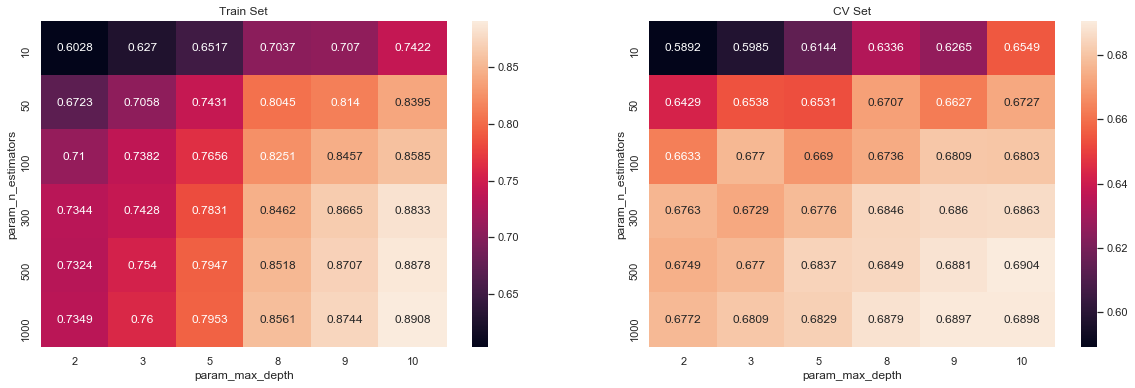

In [399]:
plot_heat_maps(clf)

## Observations:

* On train data we achieve AUC score 0f 0.868 (max_depth: 10, n_estimators: 500 ) as best number of base learner models.
* RF with max_depth above 3 and n_estimators bove 300 has better CV AUC

## C) Train model with best hyper-parameter value

In [400]:
clf = RandomForestClassifier(max_depth=rf_best_params_set1['max_depth'], n_estimators=rf_best_params_set1['n_estimators'], random_state=3)
clf.fit(X_train_set1,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( clf, X_train_set1)
y_test_pred = batch_predict( clf, X_test_set1)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

rf_test_auc_set1 = roc_auc_score(y_test, y_test_pred)

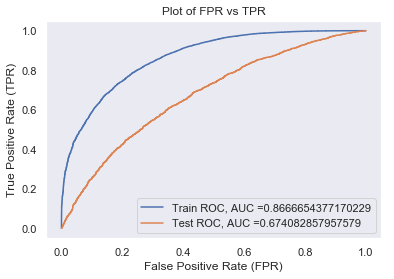

In [403]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')
plt.rcParams["axes.grid"] = False
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6034784843362546 for threshold 0.84
Confusion matrix, without normalization
Normalized confusion matrix


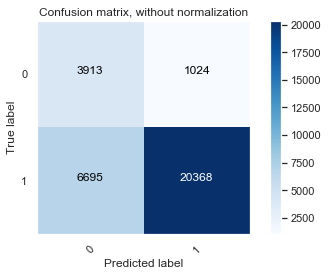

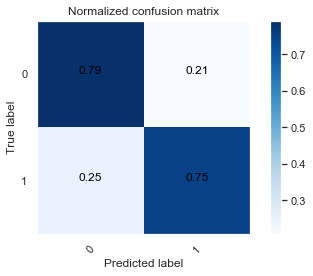

**********************************************************************


In [404]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")

compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3941456421187861 for threshold 0.843
Confusion matrix, without normalization
Normalized confusion matrix


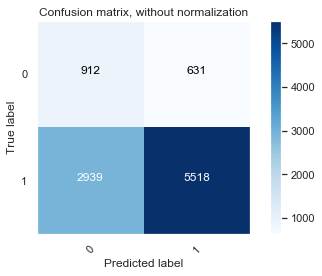

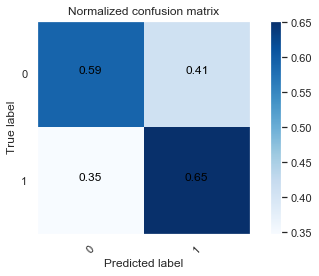

**********************************************************************


In [405]:
print("="*100)
print("Test confusion matrix")
# computa and plot confusion matrix for test data

compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* On train data we achieve AUC score 0f 0.86 (max_depth: 10, n_estimators: 500 ) as best number of base learner models.
* While on test data we achieve an AUC score of 0.67 which is much better than any random model


### Set 2: categorical, numerical features + project_title(TFIDF)+ preprocessed_eassay 
### 2.4.2 Applying Random Forest on TFIDF,<font color='red'> SET 2</font>

In [406]:
# Please write all the code with proper documentation

X_train_set2 = hstack((categories_approved_train, categories_rejected_train, sub_categories_approved_train,
                       sub_categories_rejected_train,school_state_approved_train, school_state_rejected_train,
                       teacher_prefix_approved_train, teacher_prefix_rejected_train, proj_grade_cat_approved_train,
                       proj_grade_cat_rejected_train, price_train, quantity_train,prev_teacher_proj_train,
                       title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train,
                       essay_sent_neu_train, essay_sent_compound_train,essay_tfidf_train, title_tfidf_train)).tocsr()

X_cv_set2 = hstack((categories_approved_cv, categories_rejected_cv, sub_categories_approved_cv,
                    sub_categories_rejected_cv, school_state_approved_cv, school_state_rejected_cv, 
                    teacher_prefix_approved_cv, teacher_prefix_rejected_cv, proj_grade_cat_approved_cv,
                    proj_grade_cat_rejected_cv, price_cv, quantity_cv, prev_teacher_proj_cv, 
                    title_word_count_cv, essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv,
                    essay_sent_neu_cv, essay_sent_compound_cv, essay_tfidf_cv, title_tfidf_cv)).tocsr()

X_test_set2 = hstack((categories_approved_test, categories_rejected_test, sub_categories_approved_test, 
                      sub_categories_rejected_test,school_state_approved_test, school_state_rejected_test,
                      teacher_prefix_approved_test, teacher_prefix_rejected_test, proj_grade_cat_approved_test, 
                      proj_grade_cat_rejected_test, price_test, quantity_test, prev_teacher_proj_test,
                      title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test,
                      essay_sent_neu_test, essay_sent_compound_test, essay_tfidf_test, title_tfidf_test)).tocsr()

In [407]:
print("Final Data matrix for set2")
print(X_train_set2.shape, y_train.shape)
print(X_cv_set2.shape, y_cv.shape)
print(X_test_set2.shape, y_test.shape)
print("="*100)

Final Data matrix for set2
(32000, 11674) (32000,)
(8000, 11674) (8000,)
(10000, 11674) (10000,)


## A) Finding best hyper-parameters using grid search

In [408]:
## A) Finding best hyper-parameters using grid search

model = RandomForestClassifier()
clf = find_best_params(model, X_train_set2, y_train, X_cv_set2, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
rf_best_params_set2 = clf.best_params_
rf_best_score_set2 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:  2.5min finished


Best Params:  {'max_depth': 10, 'n_estimators': 300}
Best Score:  0.6941119338863232


## Plot for Train and CrossValidation Data

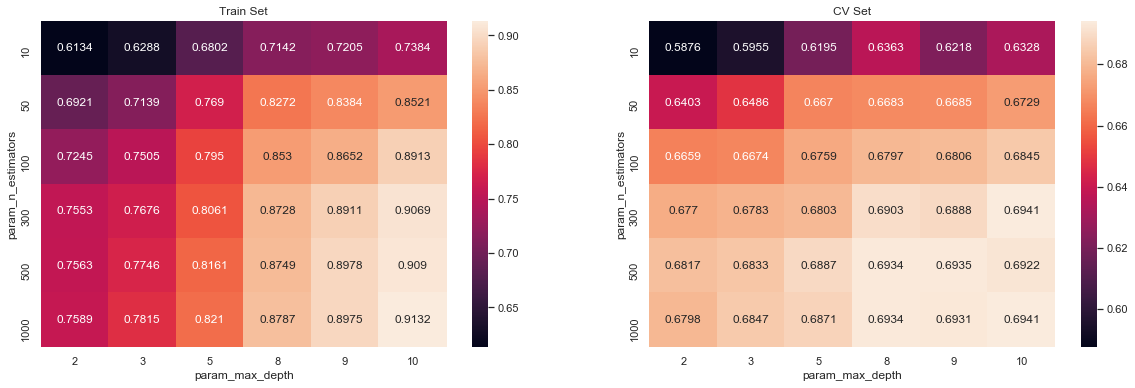

In [410]:
plot_heat_maps(clf)

## Observations:


* On train data we achieve AUC score 0f 0.88 (max_depth: 10, n_estimators: 300 ) as best number of base learner models.


## C) Train model with best hyper-parameter value

In [412]:
# best hyper parameters = Best Params:  {'max_depth': 5, 'min_samples_split': 100}
# best_params = clf.best_params_

clf = RandomForestClassifier(max_depth=rf_best_params_set2['max_depth'], n_estimators=rf_best_params_set2['n_estimators'], random_state=3)

clf.fit(X_train_set2,y_train)

# print(X_test_set2)
y_train_pred = batch_predict( clf, X_train_set2)
y_test_pred = batch_predict( clf, X_test_set2)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

rf_test_auc_set2 = roc_auc_score(y_test, y_test_pred)

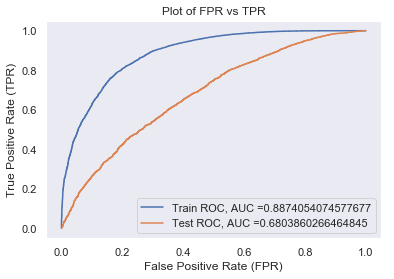

In [413]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6465934732101065 for threshold 0.846
Confusion matrix, without normalization
Normalized confusion matrix


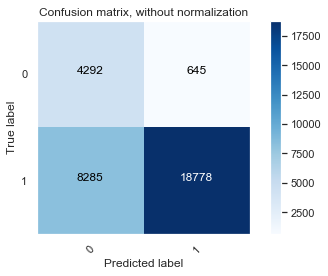

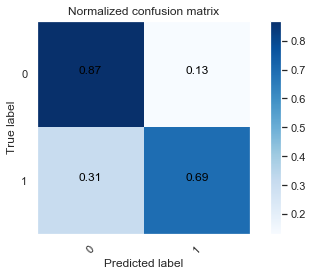

**********************************************************************


In [414]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.3917165185689092 for threshold 0.845
Confusion matrix, without normalization
Normalized confusion matrix


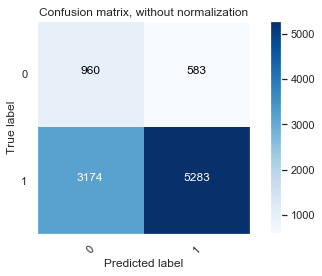

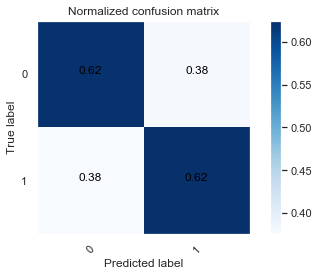

**********************************************************************


In [415]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

## Observations

* On train data we achieve AUC score 0f 0.88 (max_depth: 10, n_estimators: 300 ) as best number of base learner models.
* While on test data we achieve an AUC score of 0.68 which is much better than any random model

## Set 3: categorical `(response coding)`, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
### 4.3 Applying Random Forest on AVG W2V,<font color='red'> SET 3</font>

In [416]:
# Please write all the code with proper documentation

X_train_set3 = np.hstack((categories_approved_train, categories_rejected_train, sub_categories_approved_train,
                       sub_categories_rejected_train, school_state_approved_train, school_state_rejected_train,
                       teacher_prefix_approved_train, teacher_prefix_rejected_train, proj_grade_cat_approved_train,
                       proj_grade_cat_rejected_train, price_train, quantity_train, prev_teacher_proj_train,
                       title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train,
                       essay_sent_neu_train, essay_sent_compound_train, essay_avg_w2v_train, title_avg_w2v_train))

X_cv_set3 = np.hstack((categories_approved_cv, categories_rejected_cv, sub_categories_approved_cv,
                    sub_categories_rejected_cv, school_state_approved_cv, school_state_rejected_cv,
                    teacher_prefix_approved_cv, teacher_prefix_rejected_cv, proj_grade_cat_approved_cv,
                    proj_grade_cat_rejected_cv, price_cv, quantity_cv, prev_teacher_proj_cv, title_word_count_cv,
                    essay_word_count_cv, essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv,
                    essay_sent_compound_cv, essay_avg_w2v_cv, title_avg_w2v_cv))

X_test_set3 = np.hstack((categories_approved_test, categories_rejected_test, sub_categories_approved_test, 
                      sub_categories_rejected_test,school_state_approved_test, school_state_rejected_test, 
                      teacher_prefix_approved_test, teacher_prefix_rejected_test, proj_grade_cat_approved_test,
                      proj_grade_cat_rejected_test, price_test, quantity_test, prev_teacher_proj_test,
                      title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test,
                      essay_sent_neu_test, essay_sent_compound_test, essay_avg_w2v_test, title_avg_w2v_test))

In [417]:
print("Final Data matrix for set3")
print(X_train_set3.shape, y_train.shape)
print(X_cv_set3.shape, y_cv.shape)
print(X_test_set3.shape, y_test.shape)
print("="*100)

Final Data matrix for set3
(32000, 619) (32000,)
(8000, 619) (8000,)
(10000, 619) (10000,)


## A) Finding best hyper-parameters using grid search

In [418]:
model = RandomForestClassifier()

clf = find_best_params(model, X_train_set3, y_train, X_cv_set3, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
rf_best_params_set3 = clf.best_params_
rf_best_score_set3 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 20.9min finished


Best Params:  {'max_depth': 9, 'n_estimators': 1000}
Best Score:  0.7014031223037037


## Plot for Train and CrossValidation Data

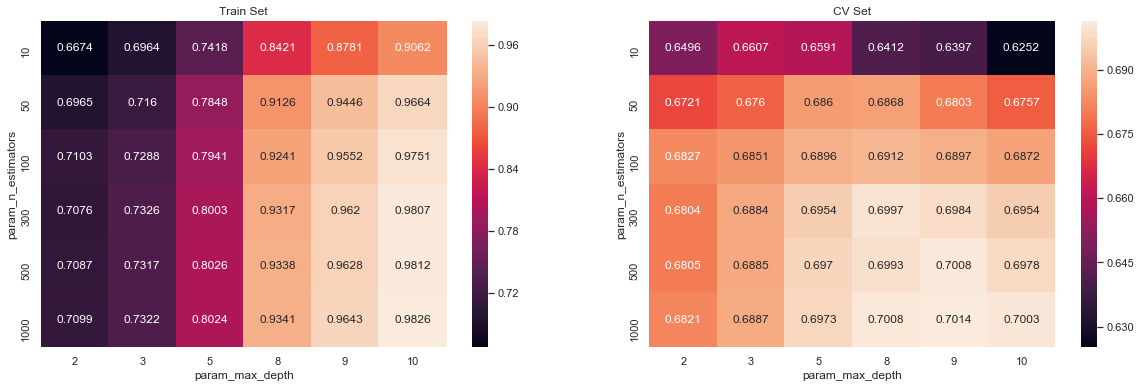

In [419]:
plot_heat_maps(clf)

## Observations

* On train data we achieve AUC score 0f 0.96 (max_depth: 9, n_estimators: 1000 ) as best number of base learner models.
* Best AUC on V data is 0.70 which is better than above models


## C) Train model with best hyper-parameter value

In [420]:
clf = RandomForestClassifier(max_depth=rf_best_params_set3['max_depth'], n_estimators=rf_best_params_set3['n_estimators'], random_state=3)

clf.fit(X_train_set3,y_train)

y_train_pred = batch_predict( clf, X_train_set3)
y_test_pred = batch_predict( clf, X_test_set3)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

rf_test_auc_set3 = roc_auc_score(y_test, y_test_pred)

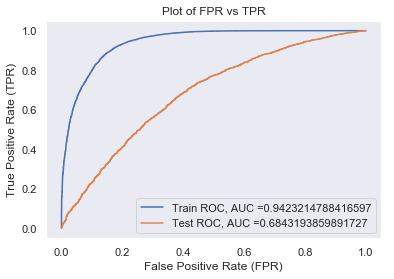

In [421]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set



Train confusion matrix
the maximum value of tpr*(1-fpr) 0.7551573728771906 for threshold 0.847
Confusion matrix, without normalization
Normalized confusion matrix


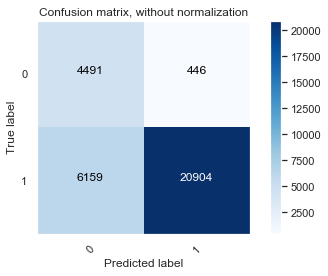

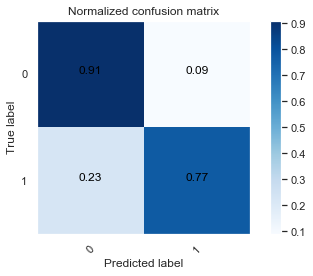

**********************************************************************


In [422]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.41260308812427726 for threshold 0.85
Confusion matrix, without normalization
Normalized confusion matrix


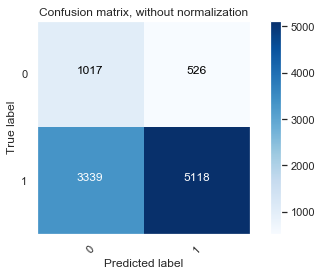

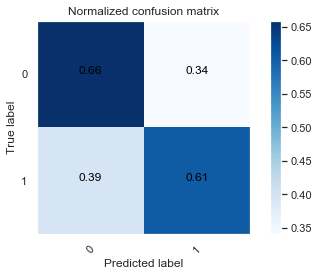

**********************************************************************


In [423]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* On train data we achieve AUC score 0f 0.94 (max_depth: 9, n_estimators: 1000 ) as best number of base learner models.
* While on test data we achieve an AUC score of 0.68 which is much better than any random model


##  Set 4: categorical `(response coding)`, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
### 4.4 Applying Random Forest on TFIDF W2V,<font color='red'> SET 4</font>

In [424]:
# Please write all the code with proper documentation

X_train_set4 = np.hstack((categories_approved_train, categories_rejected_train, sub_categories_approved_train,
                       sub_categories_rejected_train,school_state_approved_train, school_state_rejected_train,
                       teacher_prefix_approved_train, teacher_prefix_rejected_train, proj_grade_cat_approved_train,
                       proj_grade_cat_rejected_train, price_train, quantity_train, prev_teacher_proj_train,
                       title_word_count_train, essay_word_count_train, essay_sent_pos_train, essay_sent_neg_train,
                       essay_sent_neu_train, essay_sent_compound_train, essay_tfidf_w2v_train, title_tfidf_w2v_train))

X_cv_set4 = np.hstack((categories_approved_cv, categories_rejected_cv, sub_categories_approved_cv, sub_categories_rejected_cv,
                    school_state_approved_cv, school_state_rejected_cv, teacher_prefix_approved_cv,
                    teacher_prefix_rejected_cv, proj_grade_cat_approved_cv, proj_grade_cat_rejected_cv,
                    price_cv, quantity_cv, prev_teacher_proj_cv, title_word_count_cv, essay_word_count_cv,
                    essay_sent_pos_cv, essay_sent_neg_cv, essay_sent_neu_cv, essay_sent_compound_cv, essay_tfidf_w2v_cv, title_tfidf_w2v_cv))

X_test_set4 = np.hstack((categories_approved_test, categories_rejected_test, sub_categories_approved_test, 
                      sub_categories_rejected_test,school_state_approved_test, school_state_rejected_test,
                      teacher_prefix_approved_test, teacher_prefix_rejected_test, proj_grade_cat_approved_test,
                      proj_grade_cat_rejected_test, price_test, quantity_test, prev_teacher_proj_test,
                      title_word_count_test, essay_word_count_test, essay_sent_pos_test, essay_sent_neg_test,
                      essay_sent_neu_test, essay_sent_compound_test, essay_tfidf_w2v_test, title_tfidf_w2v_test))

In [425]:
print("Final Data matrix for set4")
print(X_train_set4.shape, y_train.shape)
print(X_cv_set4.shape, y_cv.shape)
print(X_test_set4.shape, y_test.shape)
print("="*100)

Final Data matrix for set4
(32000, 619) (32000,)
(8000, 619) (8000,)
(10000, 619) (10000,)


## A) Finding best hyper-parameters using grid search

In [426]:
model = RandomForestClassifier()

clf = find_best_params(model, X_train_set4, y_train, X_cv_set4, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
rf_best_params_set4 = clf.best_params_
rf_best_score_set4 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 21.7min finished


Best Params:  {'max_depth': 8, 'n_estimators': 1000}
Best Score:  0.7029532527694392


## Plot for Train and Cross Validation Data

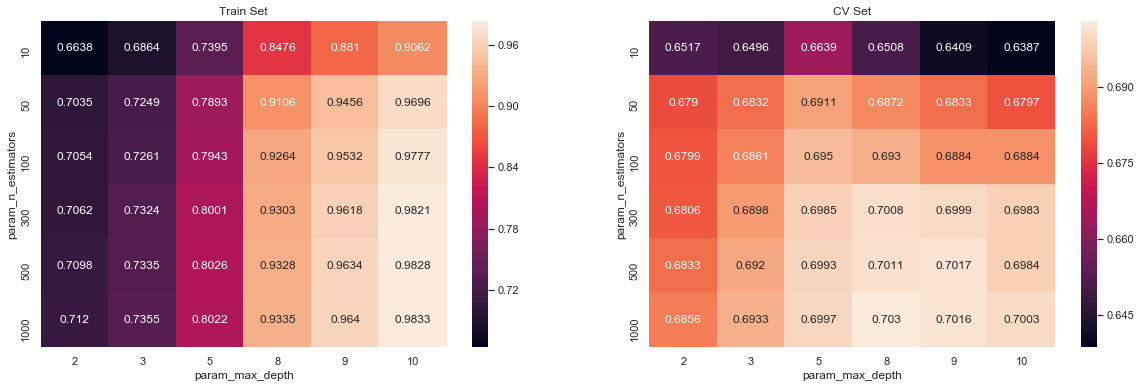

In [427]:
plot_heat_maps(clf)

## Observations

* On train data we achieve AUC score 0f 0.90 (max_depth: 8, n_estimators: 1000 ) as best number of base learner models.

## C) Train model with best hyper-parameter value

In [428]:
clf = RandomForestClassifier(max_depth=rf_best_params_set4['max_depth'], n_estimators=rf_best_params_set4['n_estimators'], random_state=3)
clf.fit(X_train_set4,y_train)

# print(X_test_set2)
y_train_pred = batch_predict( clf, X_train_set4)
y_test_pred = batch_predict( clf, X_test_set4)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

rf_test_auc_set4 = roc_auc_score(y_test, y_test_pred)

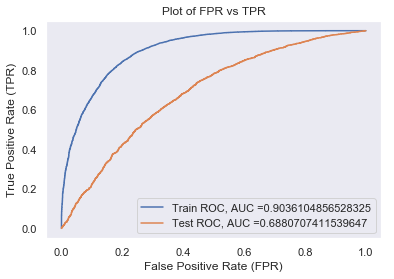

In [429]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix
### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.675093496535451 for threshold 0.844
Confusion matrix, without normalization
Normalized confusion matrix


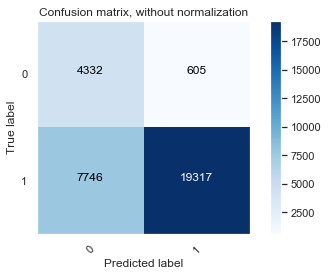

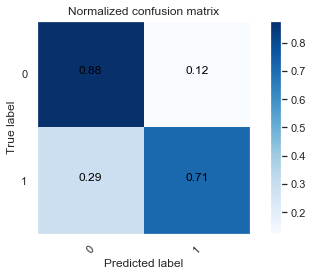

**********************************************************************


In [430]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.4105756765325192 for threshold 0.84
Confusion matrix, without normalization
Normalized confusion matrix


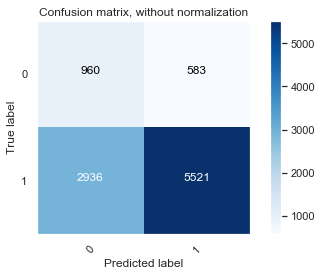

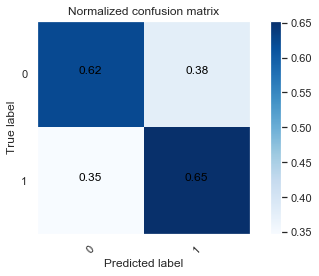

**********************************************************************


In [431]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* On train data we achieve AUC score 0f 0.90 (max_depth: 8, n_estimators: 1000 ) as best number of base learner models.
* While on test data we achieve an AUC score of 0.68 which is roughly same as above models

<h2>4 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations


### Set 1: categorical `(response coding)`, numerical features + project_title(BOW) + preprocessed_eassay 

#### 4.1 Applying GBDT on BOW,<font color='red'> SET 1</font>

In [432]:
# Please write all the code with proper documentation

print("Final Data matrix for set1")
print(X_train_set1.shape, y_train.shape)
print(X_cv_set1.shape, y_cv.shape)
print(X_test_set1.shape, y_test.shape)
print("="*100)

Final Data matrix for set1
(32000, 11674) (32000,)
(8000, 11674) (8000,)
(10000, 11674) (10000,)


## A) Finding best hyper-parameters using grid search

In [433]:
model = GradientBoostingClassifier() 

clf = find_best_params( model, X_train_set1, y_train, X_cv_set1, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
gbdt_best_params_set1 = clf.best_params_
gbdt_best_score_set1 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 62.5min finished


Best Params:  {'max_depth': 2, 'n_estimators': 1000}
Best Score:  0.7405856481114766


## Plot for Train and Cross Validation Data

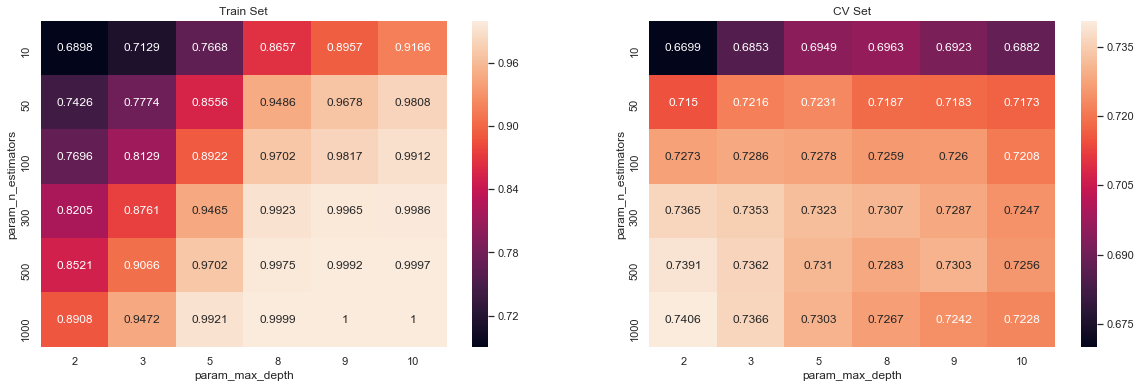

In [434]:
plot_heat_maps(clf)

## Observations:

* On train data we achieve AUC score 0f 0.86 (max_depth: 2, n_estimators: 1000 ) as best number of base learner models.


## C) Train model with best hyper-parameter value

In [435]:
clf = GradientBoostingClassifier(max_depth=gbdt_best_params_set1['max_depth'], n_estimators=gbdt_best_params_set1['n_estimators'], random_state=3)
clf.fit(X_train_set1,y_train)

# print(X_test_set1)
y_train_pred = batch_predict( clf, X_train_set1)
y_test_pred = batch_predict( clf, X_test_set1)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

gbdt_test_auc_set1 = roc_auc_score(y_test, y_test_pred)


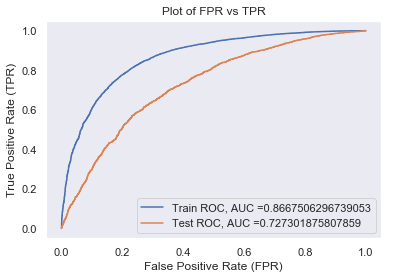

In [436]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.6236621186024572 for threshold 0.833
Confusion matrix, without normalization
Normalized confusion matrix


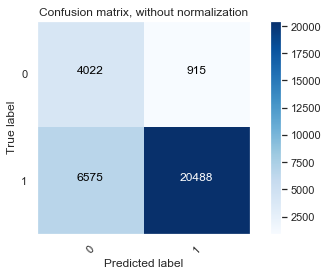

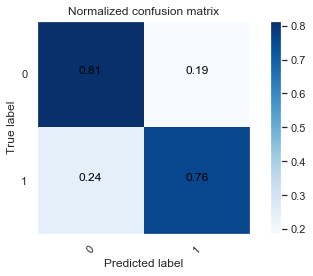

**********************************************************************


In [437]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")

compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)


### Test Set


Test confusion matrix
the maximum value of tpr*(1-fpr) 0.45222045480200207 for threshold 0.851
Confusion matrix, without normalization
Normalized confusion matrix


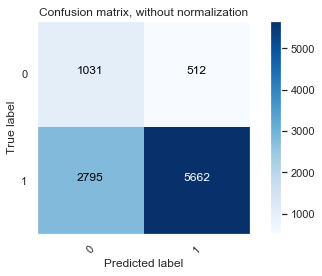

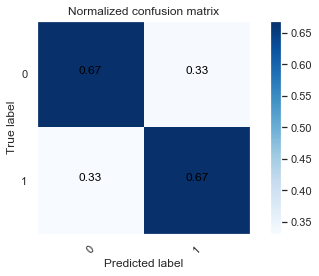

**********************************************************************


In [438]:
print("="*100)
print("Test confusion matrix")
# computa and plot confusion matrix for test data

compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>


* On train data we achieve AUC score 0f 0.86 and test AUC = 0.72 which is very good compared to Random Forest Models.


### Set 2: categorical `(response coding)`, numerical features + project_title(TFIDF)+ preprocessed_eassay 
### 4.2 Applying GBDT on TFIDF,<font color='red'> SET 2</font>


In [439]:
# Please write all the code with proper documentation
print("Final Data matrix for set2")
print(X_train_set2.shape, y_train.shape)
print(X_cv_set2.shape, y_cv.shape)
print(X_test_set2.shape, y_test.shape)
print("="*100)

Final Data matrix for set2
(32000, 11674) (32000,)
(8000, 11674) (8000,)
(10000, 11674) (10000,)


## A) Finding best hyper-parameters using grid search

In [440]:
model = GradientBoostingClassifier()
clf = find_best_params(model, X_train_set2, y_train, X_cv_set2, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
gbdt_best_params_set2 = clf.best_params_
gbdt_best_score_set2 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 152.4min finished


Best Params:  {'max_depth': 2, 'n_estimators': 500}
Best Score:  0.7305156832904822


## Plot for Train and CrossValidation Data

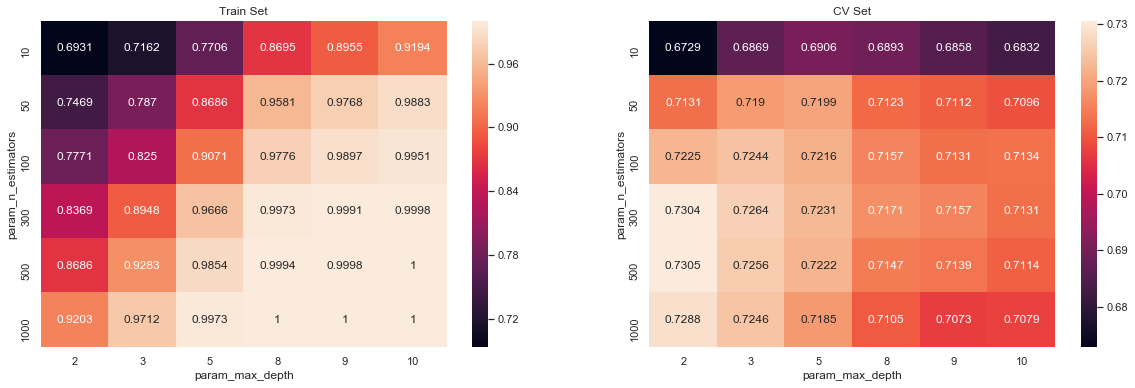

In [441]:
plot_heat_maps(clf)

## Observations:

* On train data we achieve AUC score 0f 0.90 and test AUC = 0.79 which is very good compared to Random Forest Models.


## C) Train model with best hyper-parameter value

In [442]:
# best hyper parameters = Best Params:  {'max_depth': 5, 'min_samples_split': 100}
# best_params = clf.best_params_

clf = GradientBoostingClassifier(max_depth=gbdt_best_params_set2['max_depth'], n_estimators=gbdt_best_params_set2['n_estimators'], random_state=3)

clf.fit(X_train_set2,y_train)

# print(X_test_set2)
y_train_pred = batch_predict( clf, X_train_set2)
y_test_pred = batch_predict( clf, X_test_set2)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

gbdt_test_auc_set2 = roc_auc_score(y_test, y_test_pred)

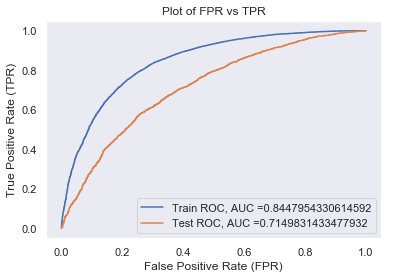

In [443]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5917592220302681 for threshold 0.843
Confusion matrix, without normalization
Normalized confusion matrix


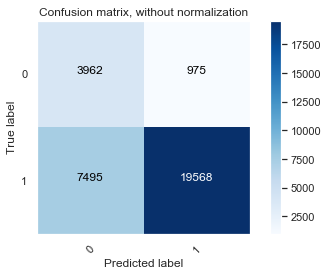

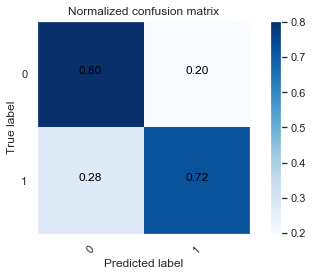

**********************************************************************


In [444]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.43651728759978325 for threshold 0.859
Confusion matrix, without normalization
Normalized confusion matrix


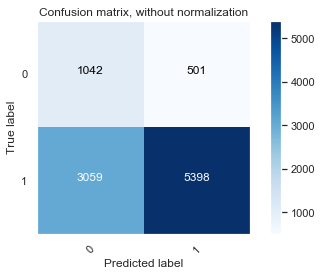

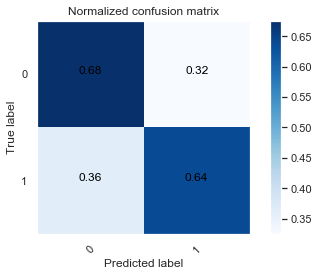

**********************************************************************


In [445]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

## Observations:

* On train data we achieve AUC score 0f 0.84 (max_depth: 2, n_estimators: 500 ) as best number of base learner models.
* Out Test AUC score is 0.714 which is good.

## Set 3: categorical, numerical features + project_title(AVG W2V)+ preprocessed_essay (AVG W2V)
### 4.3 Applying GBDT on AVG W2V,<font color='red'> SET 3</font>

In [446]:
# Please write all the code with proper documentation

print("Final Data matrix for set3")
print(X_train_set3.shape, y_train.shape)
print(X_cv_set3.shape, y_cv.shape)
print(X_test_set3.shape, y_test.shape)
print("="*100)

Final Data matrix for set3
(32000, 619) (32000,)
(8000, 619) (8000,)
(10000, 619) (10000,)


## A) Finding best hyper-parameters using grid search

In [447]:
model = GradientBoostingClassifier()

clf = find_best_params(model, X_train_set3, y_train, X_cv_set3, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
gbdt_best_params_set3 = clf.best_params_
gbdt_best_score_set3 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 37.0min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 1004.7min finished


Best Params:  {'max_depth': 2, 'n_estimators': 300}
Best Score:  0.7384379381482543



## Plot for Train and CrossValidation Data

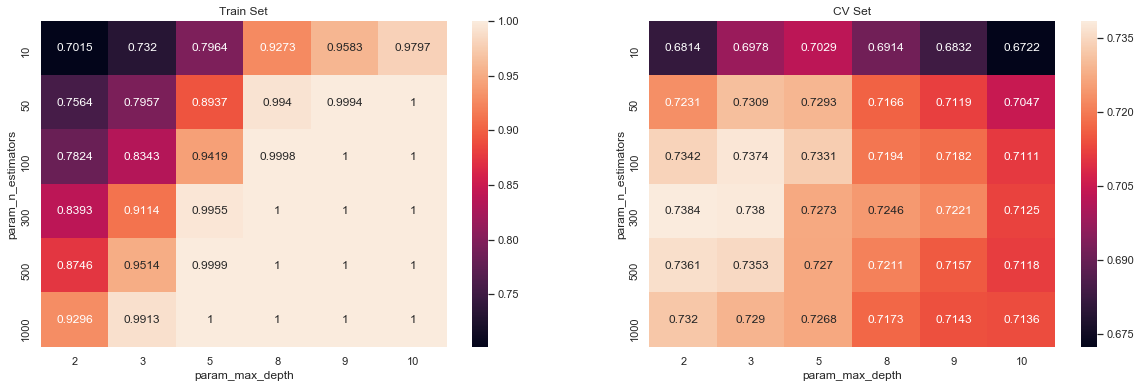

In [448]:
plot_heat_maps(clf)

## C) Train model with best hyper-parameter value

In [449]:
clf = GradientBoostingClassifier(max_depth=gbdt_best_params_set3['max_depth'], n_estimators=gbdt_best_params_set3['n_estimators'], random_state=3)

clf.fit(X_train_set3,y_train)

y_train_pred = batch_predict( clf, X_train_set3)
y_test_pred = batch_predict( clf, X_test_set3)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

gbdt_test_auc_set3 = roc_auc_score(y_test, y_test_pred)

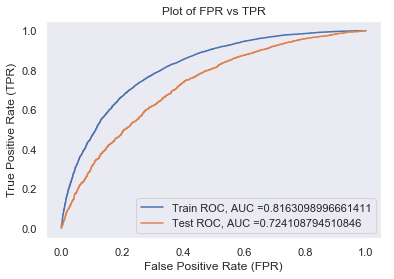

In [450]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix

### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.5494361647143096 for threshold 0.846
Confusion matrix, without normalization
Normalized confusion matrix


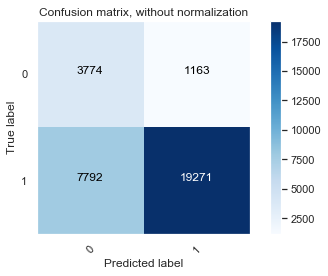

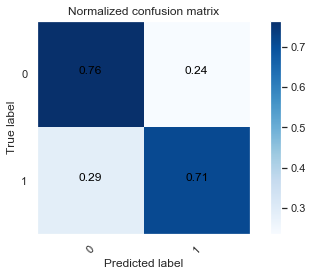

**********************************************************************


In [451]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)


### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44458984343119334 for threshold 0.857
Confusion matrix, without normalization
Normalized confusion matrix


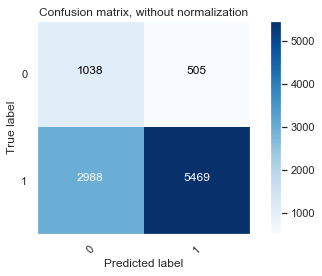

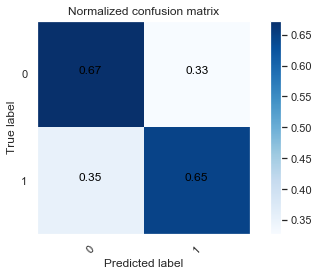

**********************************************************************


In [452]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get our Best Params as {'max_depth': 2, 'num_estimators': 300}.
* Test AUC on Avg W2V is almost same as that on BOW and TFIDF features.

##  Set 4: categorical `(response coding)`, numerical features + project_title(TFIDF W2V)+ preprocessed_essay (TFIDF W2V)
### 4.4 Applying GBDT on TFIDF W2V,<font color='red'> SET 4</font>

In [453]:
print("Final Data matrix for set4")
print(X_train_set4.shape, y_train.shape)
print(X_cv_set4.shape, y_cv.shape)
print(X_test_set4.shape, y_test.shape)
print("="*100)

Final Data matrix for set4
(32000, 619) (32000,)
(8000, 619) (8000,)
(10000, 619) (10000,)


## A) Finding best hyper-parameters using grid search

In [454]:
model = GradientBoostingClassifier()

clf = find_best_params(model, X_train_set4, y_train, X_cv_set4, y_cv)
train_auc = clf.cv_results_['mean_train_score']
cv_auc = clf.cv_results_['mean_test_score']

# clf.cv_results_
gbdt_best_params_set4 = clf.best_params_
gbdt_best_score_set4 = clf.best_score_
print('Best Params: ', clf.best_params_)
print('Best Score: ', clf.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed: 37.4min
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed: 562.8min finished


Best Params:  {'max_depth': 2, 'n_estimators': 300}
Best Score:  0.7373795983459962


## Plot for Train and Cross Validation Data

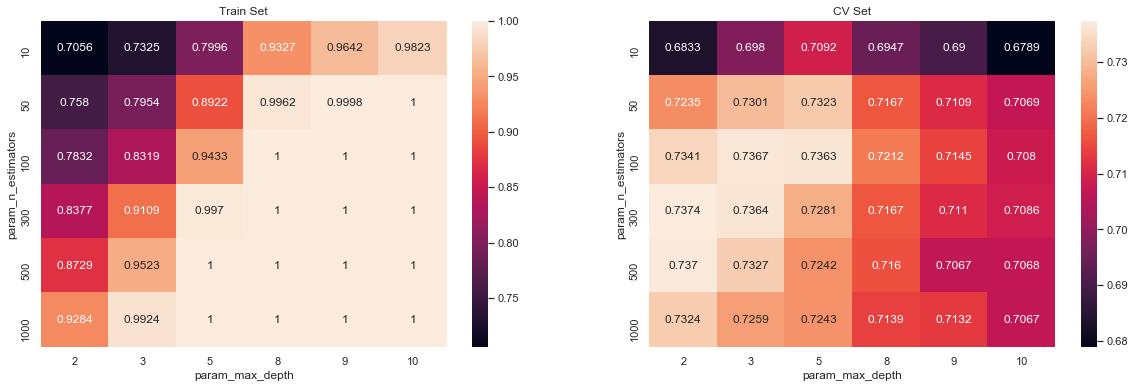

In [455]:
plot_heat_maps(clf)

## C) Train model with best hyper-parameter value

In [456]:
clf = GradientBoostingClassifier(max_depth=gbdt_best_params_set4['max_depth'], n_estimators=gbdt_best_params_set4['n_estimators'], random_state=3)
clf.fit(X_train_set4,y_train)

# print(X_test_set2)
y_train_pred = batch_predict( clf, X_train_set4)
y_test_pred = batch_predict( clf, X_test_set4)


fpr_train, tpr_train, thresh1 = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, thresh = roc_curve(y_test, y_test_pred)

gbdt_test_auc_set4 = roc_auc_score(y_test, y_test_pred)

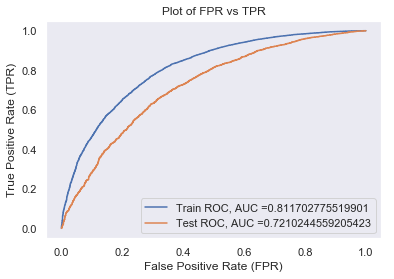

In [457]:
plt.plot(fpr_train,tpr_train, label='Train ROC, AUC ='+str(auc(fpr_train, tpr_train)));
plt.plot(fpr_test,tpr_test, label='Test ROC, AUC ='+str(auc(fpr_test, tpr_test)))
plt.xlabel('False Positive Rate (FPR)') 
plt.ylabel("True Positive Rate (TPR)")
plt.title('Plot of FPR vs TPR')    
plt.legend()
plt.show()

## D) Confusion Matrix
### Train Set

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.543433830952408 for threshold 0.849
Confusion matrix, without normalization
Normalized confusion matrix


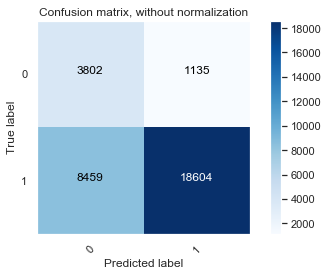

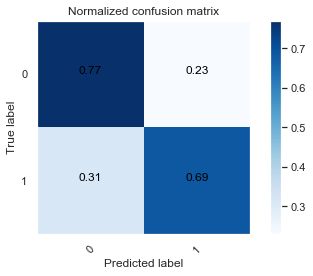

**********************************************************************


In [458]:
# computa and plot confusion matrix for train data
print("="*100)
print("Train confusion matrix")
compute_confusion_matrix(y_train, y_train_pred, thresh1, fpr_train, tpr_train)

### Test Set

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.44789887096869374 for threshold 0.866
Confusion matrix, without normalization
Normalized confusion matrix


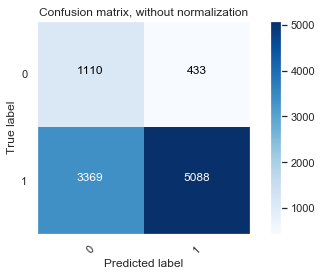

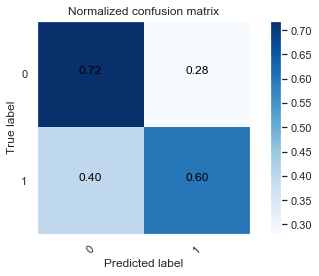

**********************************************************************


In [459]:
print("="*100)
print("Test confusion matrix")
compute_confusion_matrix(y_test, y_test_pred, thresh, fpr_test, tpr_test)

<h3>Observations</h3>

* We get our Best Params as {'max_depth': 2, 'n_estimators': 300} and best Test AUC as 0.71.
* Test AUC on TFIDF W2V is same as that of Agv W2V.

<h1>4. Conclusions</h1>

In [460]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["BOW", 'RF', rf_best_params_set1, rf_test_auc_set1])
x.add_row(["TFIDF", 'RF', rf_best_params_set2, rf_test_auc_set2])
x.add_row(["Avg W2V", 'RF', rf_best_params_set3, rf_test_auc_set3])
x.add_row(["TFIDF W2V", 'RF', rf_best_params_set4, rf_test_auc_set4])
x.add_row(["BOW", 'GBDT', gbdt_best_params_set1, gbdt_test_auc_set1])
x.add_row(["TFIDF", 'GBDT', gbdt_best_params_set2, gbdt_test_auc_set2])
x.add_row(["Avg W2V", 'GBDT', gbdt_best_params_set3, gbdt_test_auc_set3])
x.add_row(["TFIDF W2V", 'GBDT', gbdt_best_params_set4, gbdt_test_auc_set4])


print(x)

+------------+-------+----------------------------------------+--------------------+
| Vectorizer | Model |            Hyper Parameter             |        AUC         |
+------------+-------+----------------------------------------+--------------------+
|    BOW     |   RF  | {'max_depth': 10, 'n_estimators': 500} | 0.674082857957579  |
|   TFIDF    |   RF  | {'max_depth': 10, 'n_estimators': 300} | 0.6803860266464845 |
|  Avg W2V   |   RF  | {'max_depth': 9, 'n_estimators': 1000} | 0.6843193859891727 |
| TFIDF W2V  |   RF  | {'max_depth': 8, 'n_estimators': 1000} | 0.6880707411539647 |
|    BOW     |  GBDT | {'max_depth': 2, 'n_estimators': 1000} | 0.727301875807859  |
|   TFIDF    |  GBDT | {'max_depth': 2, 'n_estimators': 500}  | 0.7149831433477932 |
|  Avg W2V   |  GBDT | {'max_depth': 2, 'n_estimators': 300}  | 0.724108794510846  |
| TFIDF W2V  |  GBDT | {'max_depth': 2, 'n_estimators': 300}  | 0.7210244559205423 |
+------------+-------+----------------------------------------+--

<h3>Observations</h3>

* Random Forest performs better on deep trees while GBDT performs better in shallow trees.
* Best Test AUC value is achieved using GBDT and is 0.7241
* Overall GBDT performs better than Random Forest.